In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
!pip install umap-learn
import umap
import seaborn as sns
import plotly.graph_objects as go
!pip install imblearn

from sklearn.metrics import accuracy_score, f1_score,auc

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=5b3ee68543ccb6d1ae61c565b47e3cc74611292a2566efe532fb64b96a783929
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=6daa07674cac6b7af7aa2717d7f27d21a0f8f62225504f98eca72e83d8ee8cf6
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [4]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded=files.upload()
import io
df=pd.read_csv(io.BytesIO(uploaded['bankTransactions1.csv']))

Saving bankTransactions1.csv to bankTransactions1.csv


In [5]:
df.shape


(10000, 16)

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts
0,1,15634602,Hargrave,tertiary,Takoradi,Female,42,2,married,1,101348.88,1,1,1,1,4
1,2,15647311,Hill,secondary,Takoradi,Female,41,1,single,1,112542.58,0,0,1,1,2
2,3,15619304,Onio,secondary,Sunyani,Female,42,8,married,0,113931.57,0,0,0,0,0
3,4,15701354,Boni,unknown,Sunyani,Female,39,1,married,0,93826.63,1,0,0,0,1
4,5,15737888,Mitchell,unknown,Takoradi,Female,43,2,single,1,79084.10,1,0,0,0,1
5,6,15574012,Chu,tertiary,Koforidua,Male,44,8,married,0,149756.71,0,0,1,1,2
6,7,15592531,Bartlett,tertiary,Cape Coast,Male,50,7,single,1,10062.80,1,0,1,1,3
7,8,15656148,Obinna,tertiary,Sunyani,Female,29,4,divorced,0,119346.88,1,0,1,1,3
8,9,15792365,He,primary,Takoradi,Male,44,4,married,1,74940.50,0,0,0,0,0
9,10,15592389,H?,secondary,Tamale,Male,27,2,single,1,71725.73,1,0,0,0,1


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts
9995,9996,15606229,Obijiaku,primary,Accra,Male,39,5,married,0,96270.64,0,0,0,1,1
9996,9997,15569892,Johnstone,tertiary,Accra,Male,35,10,married,1,101699.77,0,0,0,0,0
9997,9998,15584532,Liu,primary,Accra,Male,36,7,married,1,42085.58,0,0,1,0,1
9998,9999,15682355,Sabbatini,tertiary,Accra,Male,42,3,married,0,92888.52,0,0,1,1,2
9999,10000,15628319,Walker,secondary,Sunyani,Female,28,4,married,0,38190.78,0,0,0,1,1


In [8]:
df.describe()

,RowNumber,CustomerId,Age,Tenure,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,35.802200,4.523800,0.515100,99945.486181,0.333600,0.181200,0.306900,0.421500,1.243200
std,2886.89568,7.193619e+04,10.553986,2.884626,0.499797,57600.445044,0.471522,0.385203,0.461231,0.493824,0.856812
min,1.00000,1.556570e+07,18.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,28.000000,2.000000,0.000000,50777.030000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5000.50000,1.569074e+07,34.000000,5.000000,1.000000,100067.820000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7500.25000,1.575323e+07,41.000000,7.000000,1.000000,149373.527500,1.000000,0.000000,1.000000,1.000000,2.000000
max,10000.00000,1.581569e+07,88.000000,10.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
mv=df.isnull().sum()
mv

RowNumber          0
CustomerId         0
Surname            0
education          0
Geography          0
Gender             0
Age                0
Tenure             0
marital            0
IsActiveMember     0
EstimatedSalary    0
HasApp             0
HasLoan            0
HasInsurance       0
HasCrCard          0
NumOfProducts      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   education        10000 non-null  object 
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   marital          10000 non-null  object 
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  HasApp           10000 non-null  int64  
 12  HasLoan          10000 non-null  int64  
 13  HasInsurance     10000 non-null  int64  
 14  HasCrCard        10000 non-null  int64  
 15  NumOfProducts    10000 non-null  int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 1.2+ MB


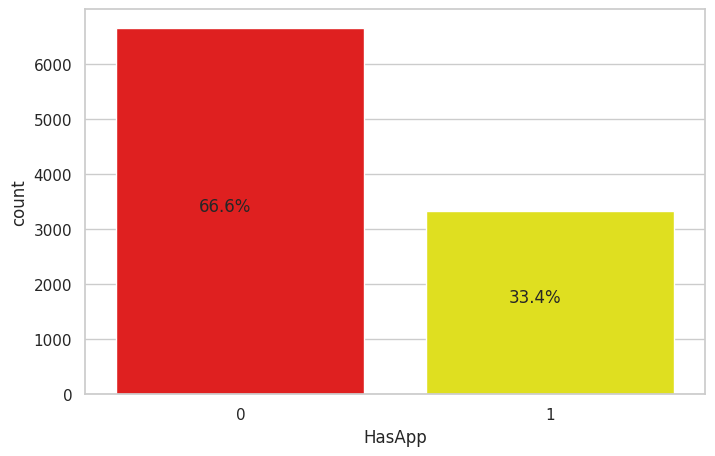

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="HasApp", data=df,palette=['red', 'yellow'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2-0.05
  y = p.get_height()/2-0.05
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

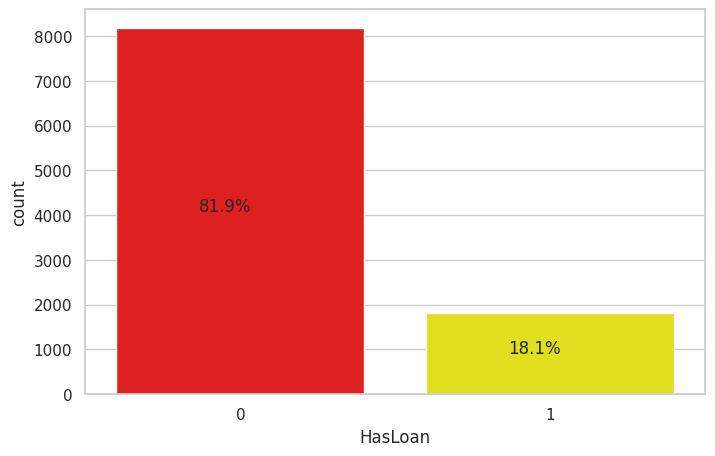

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="HasLoan", data=df,palette=['red', 'yellow'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2-0.05
  y = p.get_height()/2-0.05
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

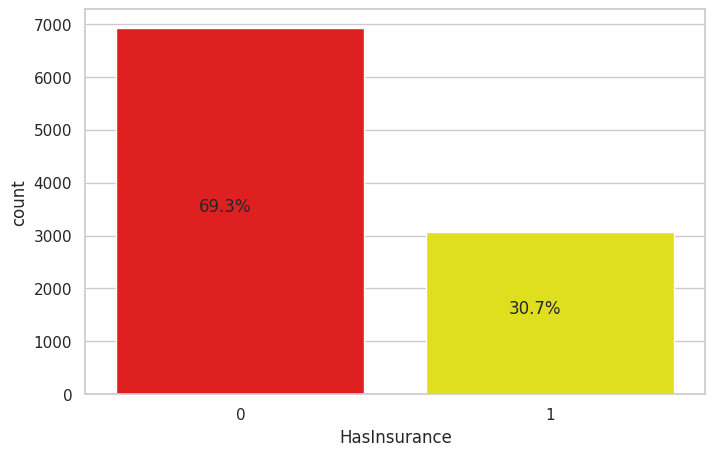

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="HasInsurance", data=df,palette=['red', 'yellow'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2-0.05
  y = p.get_height()/2-0.05
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

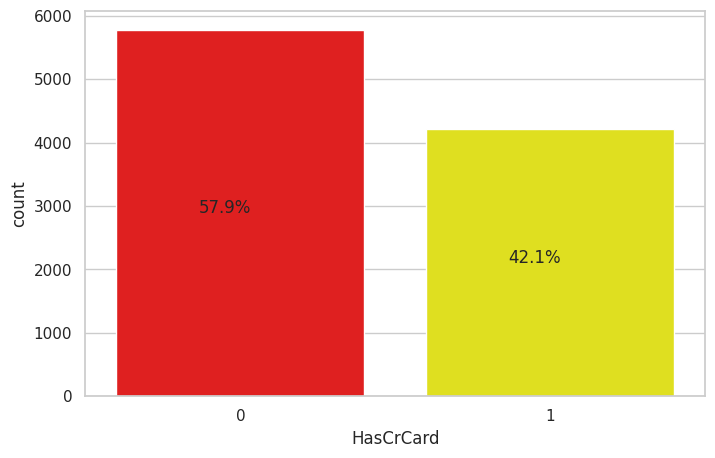

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="HasCrCard", data=df,palette=['red', 'yellow'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2-0.05
  y = p.get_height()/2-0.05
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

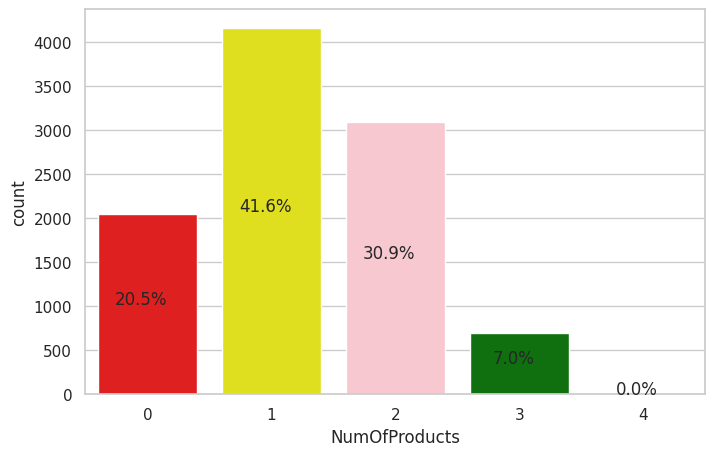

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="NumOfProducts", data=df,palette=['red', 'yellow','pink','green'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()/2-0.05
  y = p.get_height()/2-0.05
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

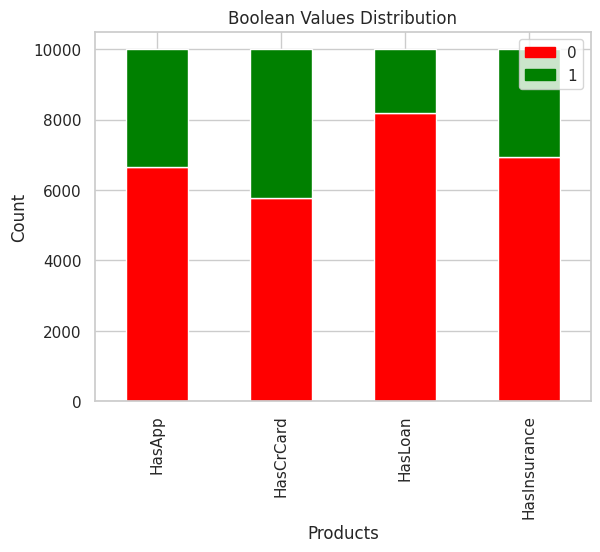

In [16]:
selected_columns = ['HasApp', 'HasCrCard', 'HasLoan', 'HasInsurance']
selected_data = df[selected_columns]


counts = selected_data.apply(pd.Series.value_counts)
colors = {True: 'green', False: 'red'}

ax = counts.T.plot(kind='bar', stacked=True, color=[colors[val] for val in counts.index])



plt.xlabel('Products')
plt.ylabel('Count')
plt.title('Boolean Values Distribution')


handles = [plt.Rectangle((0,0),1,1, color=colors[val]) for val in counts.index]
plt.legend(handles, counts.index)

# Display the plot
plt.show()

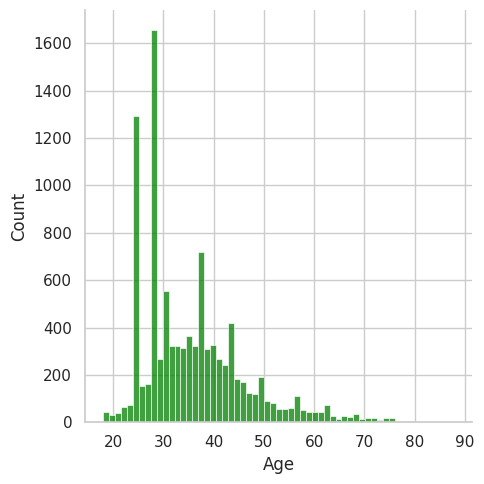

In [17]:
sns.displot(df['Age'],color='green')

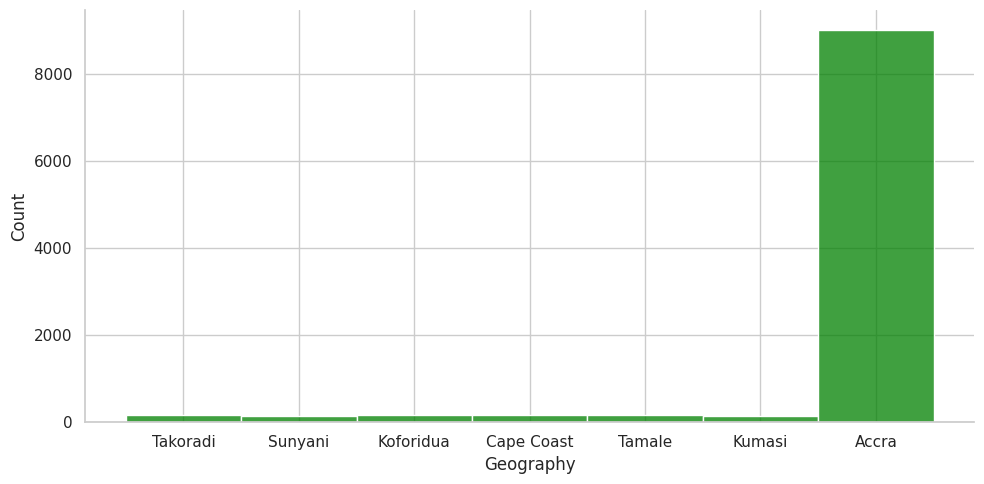

In [18]:
sns.displot(df['Geography'],color='green',height=5, aspect=2)

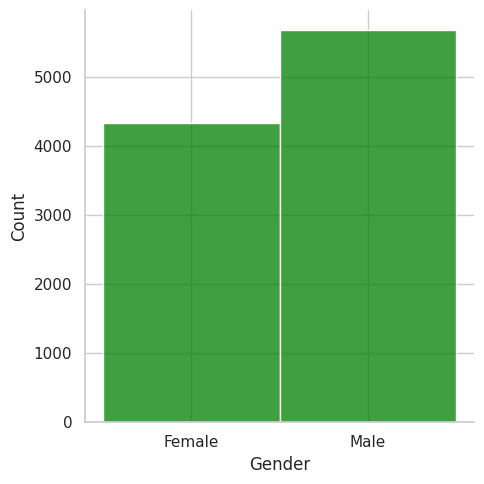

In [19]:
sns.displot(df['Gender'],color='green')

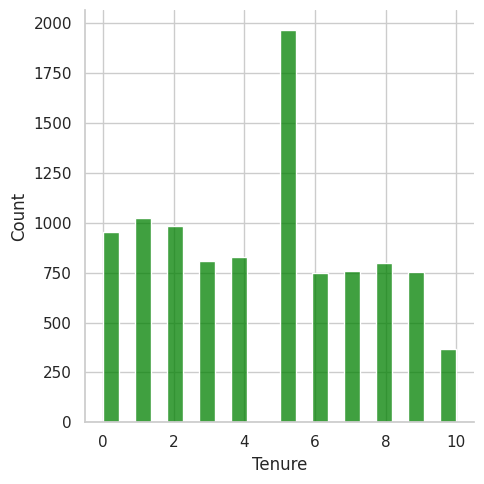

In [20]:
sns.displot(df['Tenure'],color='green')

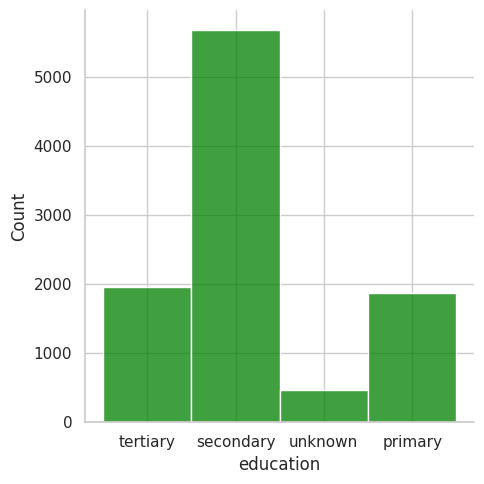

In [21]:
sns.displot(df['education'],color='green')

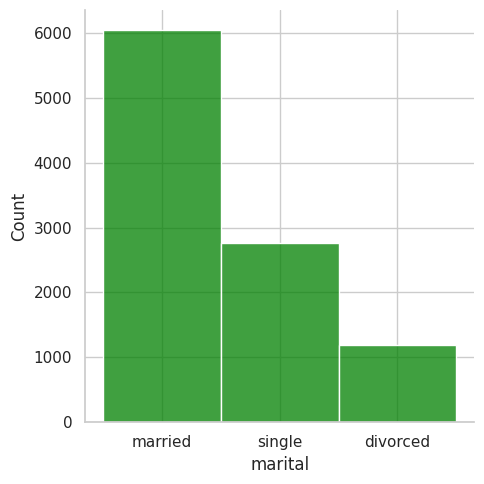

In [22]:
sns.displot(df['marital'],color='green')

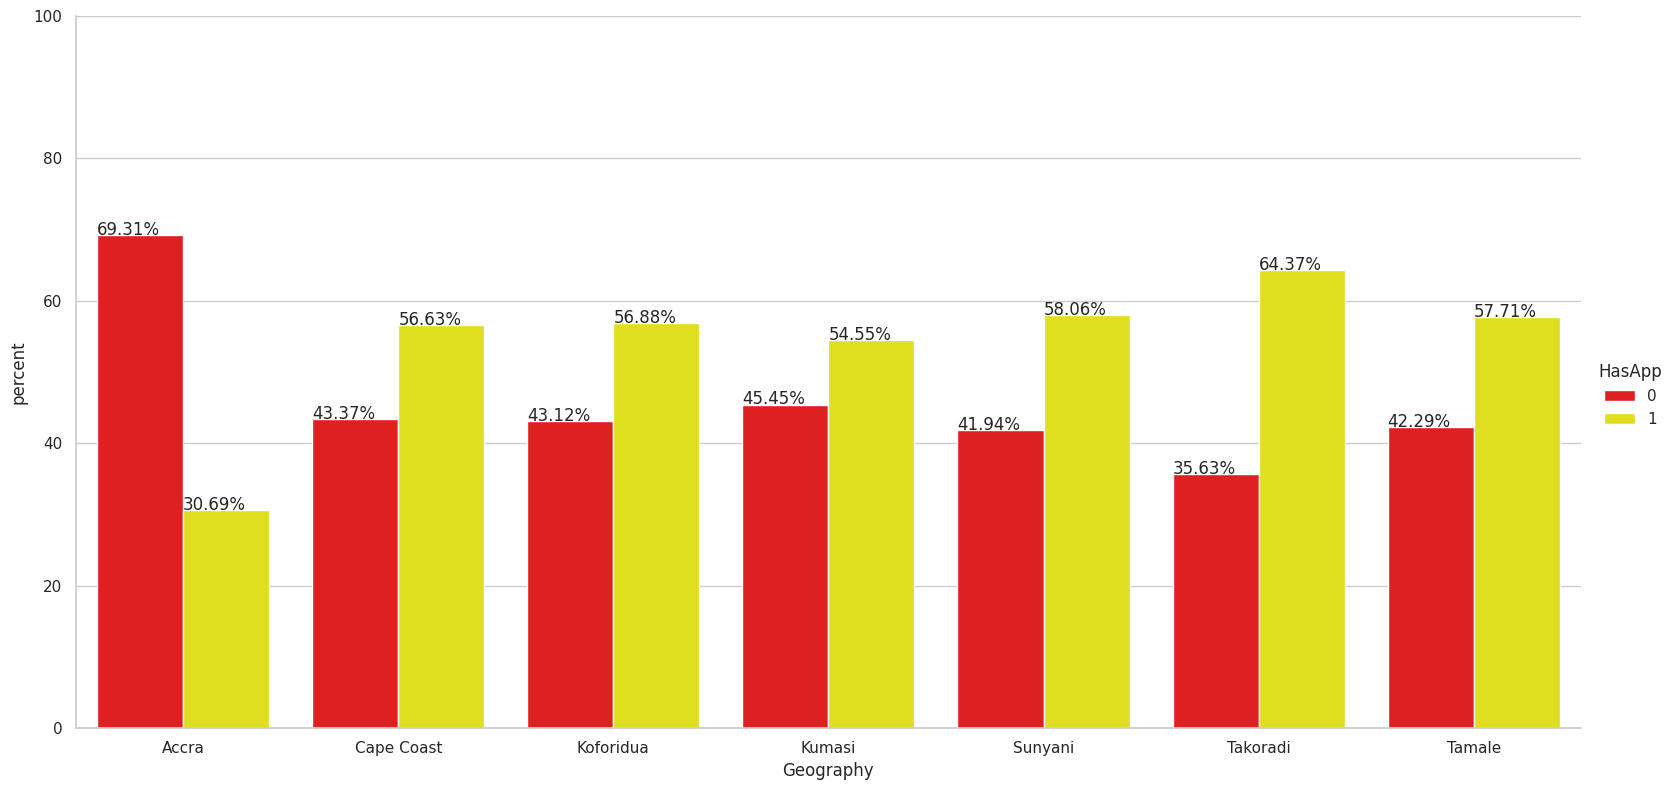

In [23]:


x='Geography'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

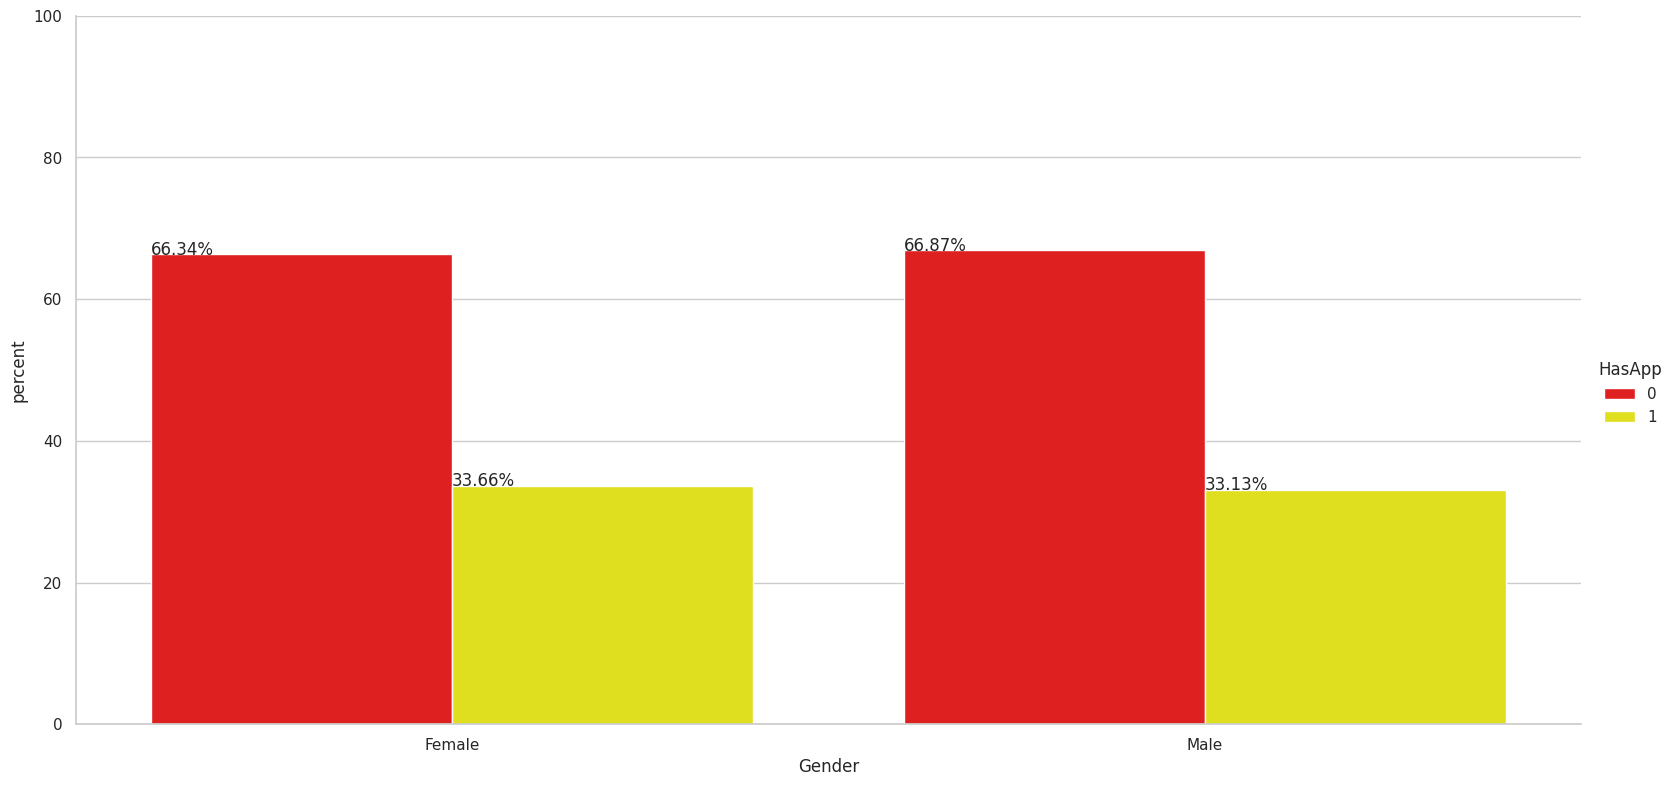

In [24]:
x='Gender'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

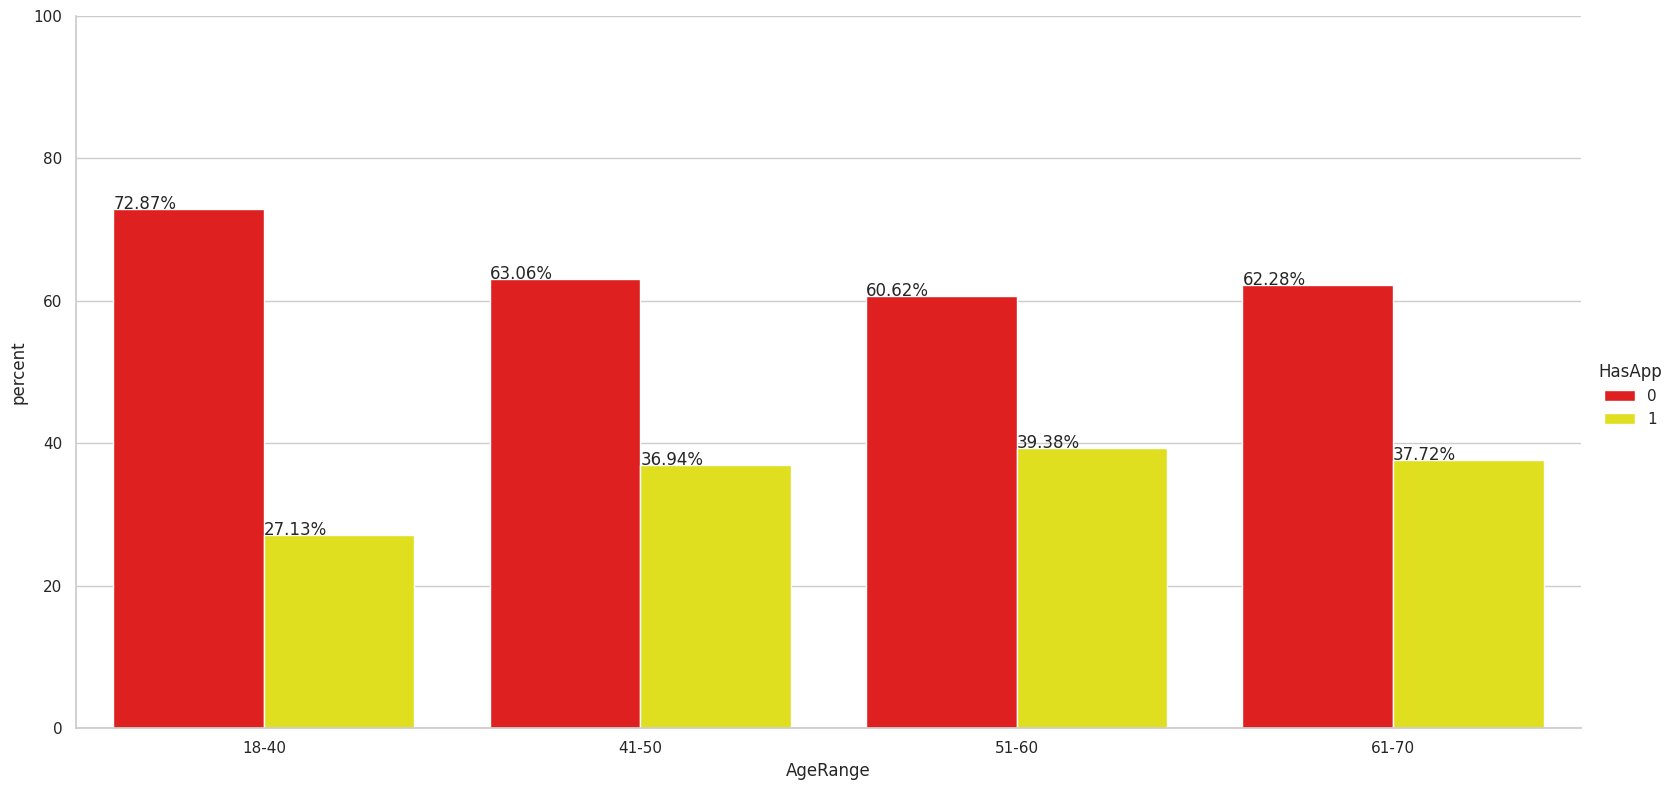

In [25]:
bins = [18, 30, 50, 60, 70]  # Define your age ranges
labels = ['18-40', '41-50', '51-60', '61-70']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
x='AgeRange'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()



g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

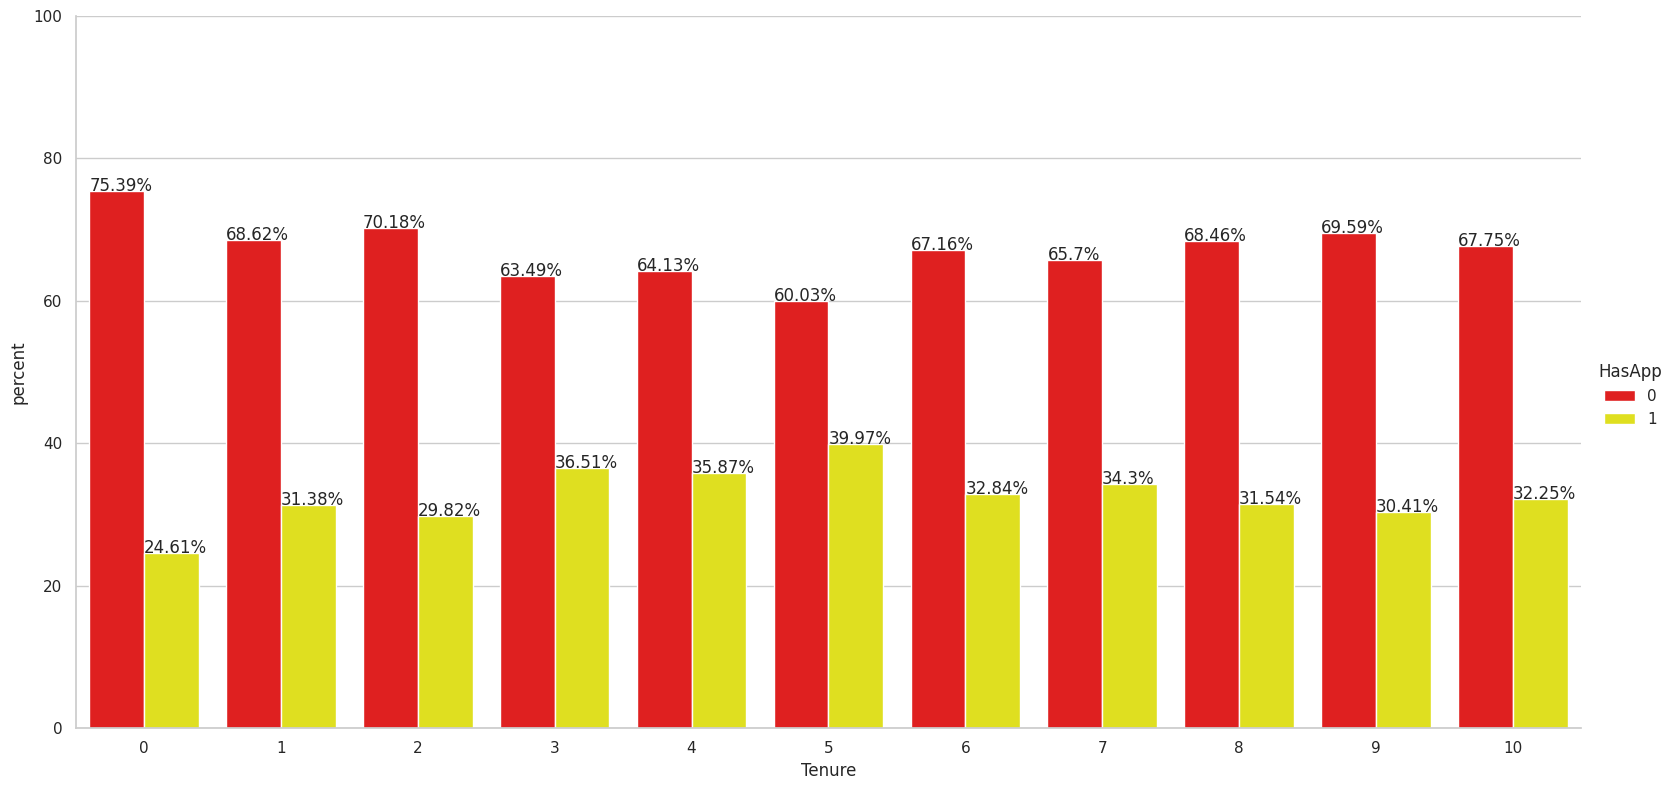

In [26]:
x='Tenure'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

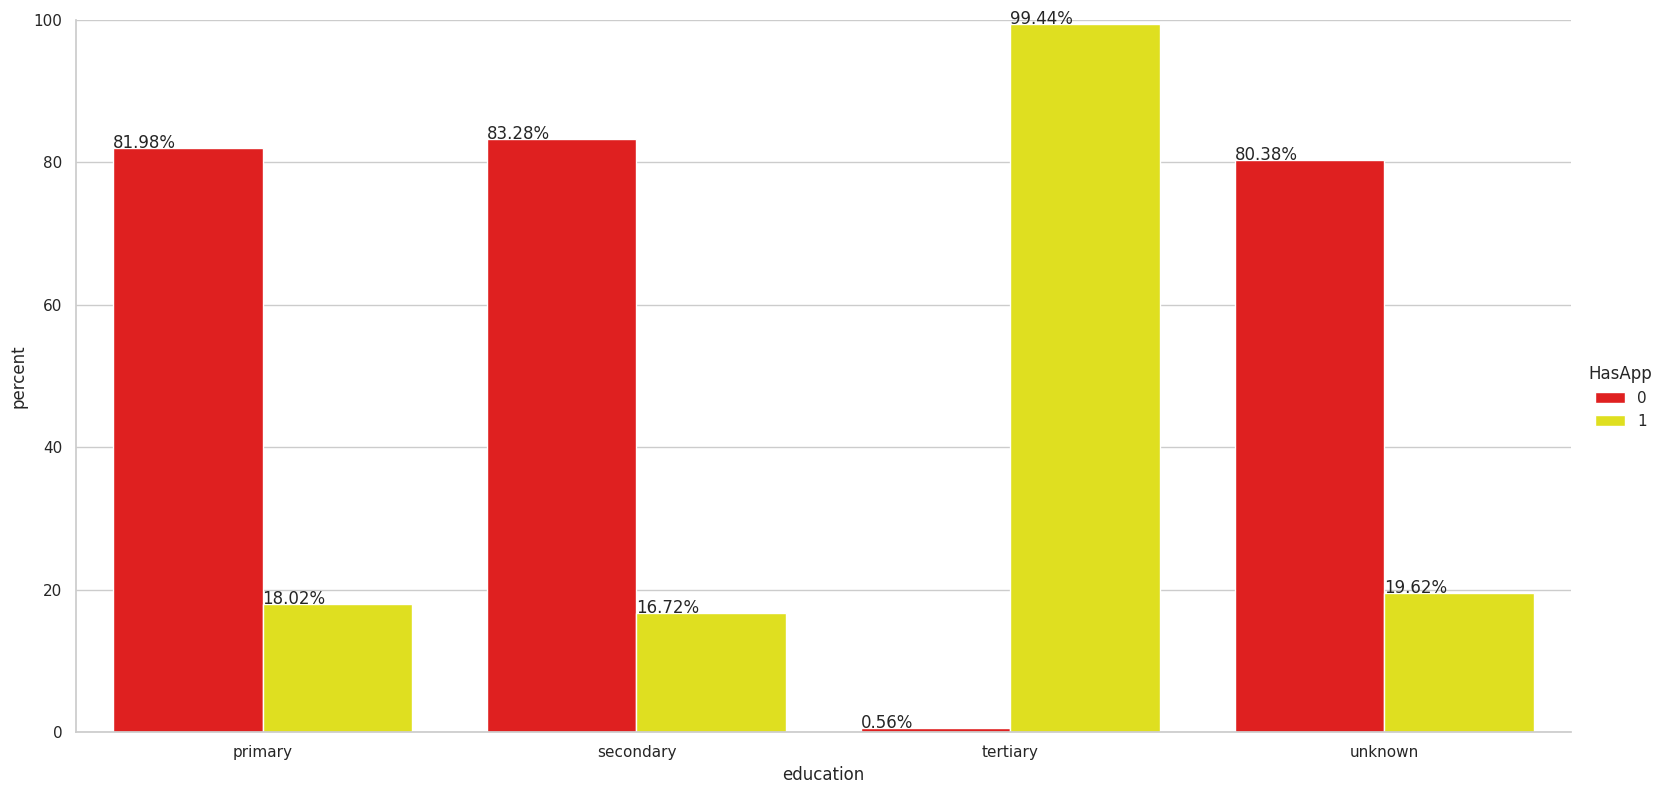

In [27]:
x='education'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

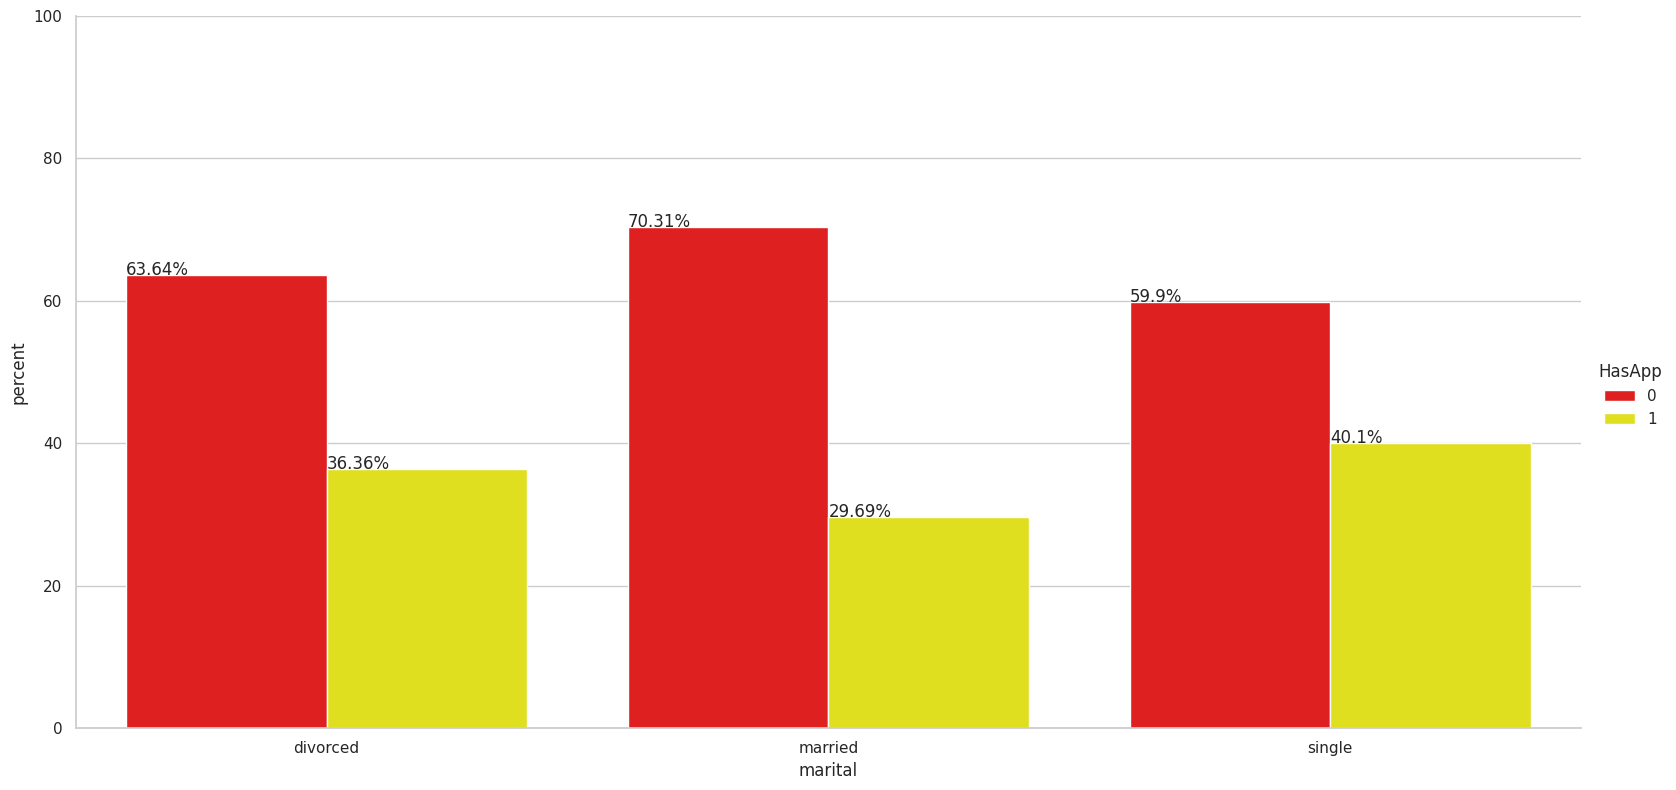

In [28]:
x='marital'
y= 'HasApp'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)



for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

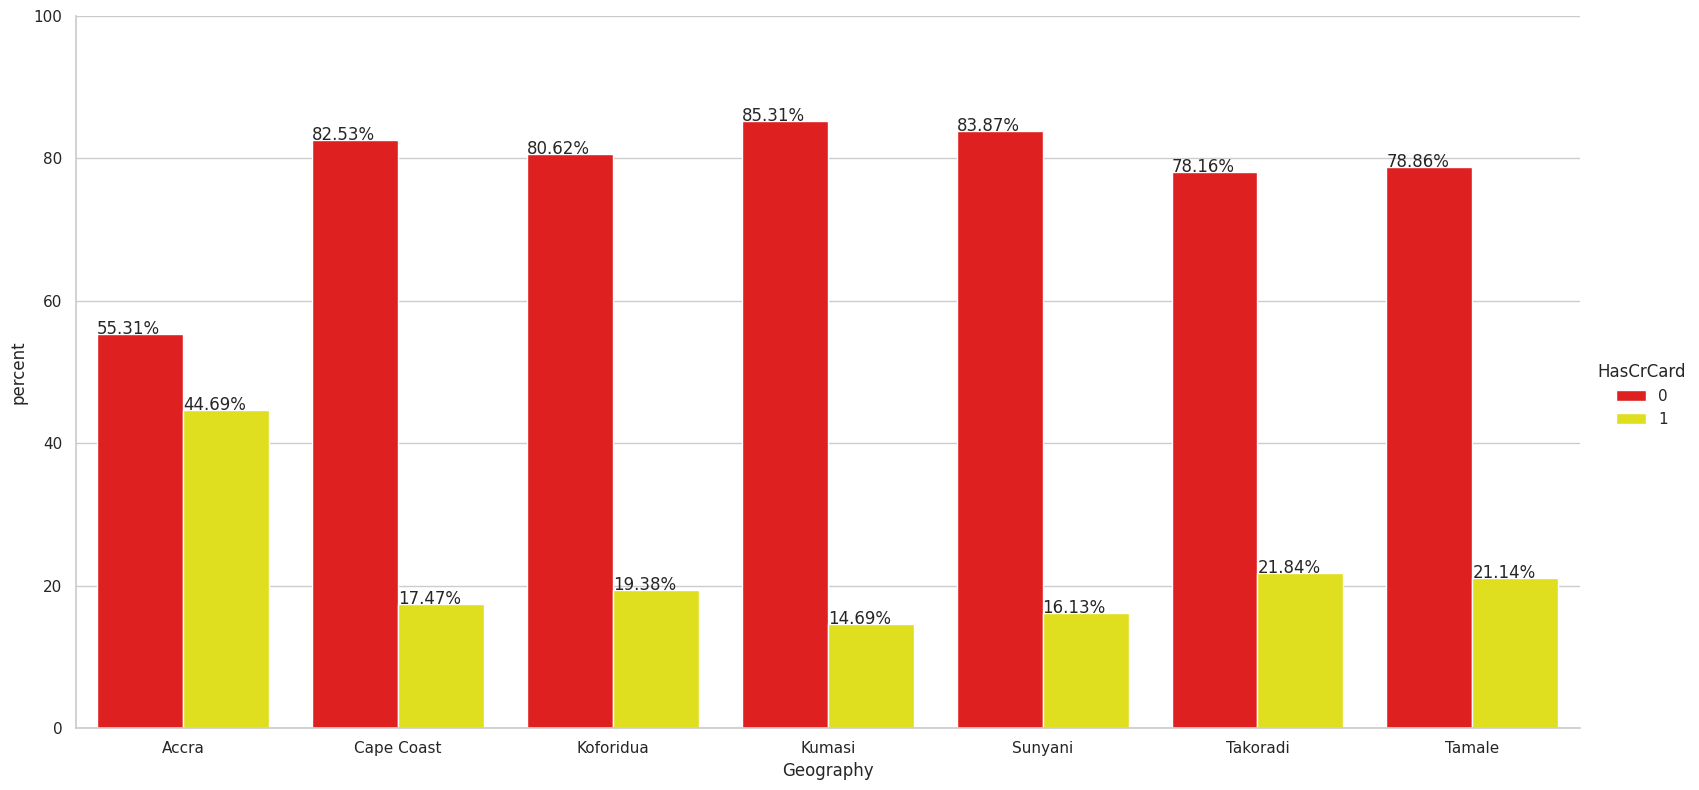

In [29]:
x='Geography'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

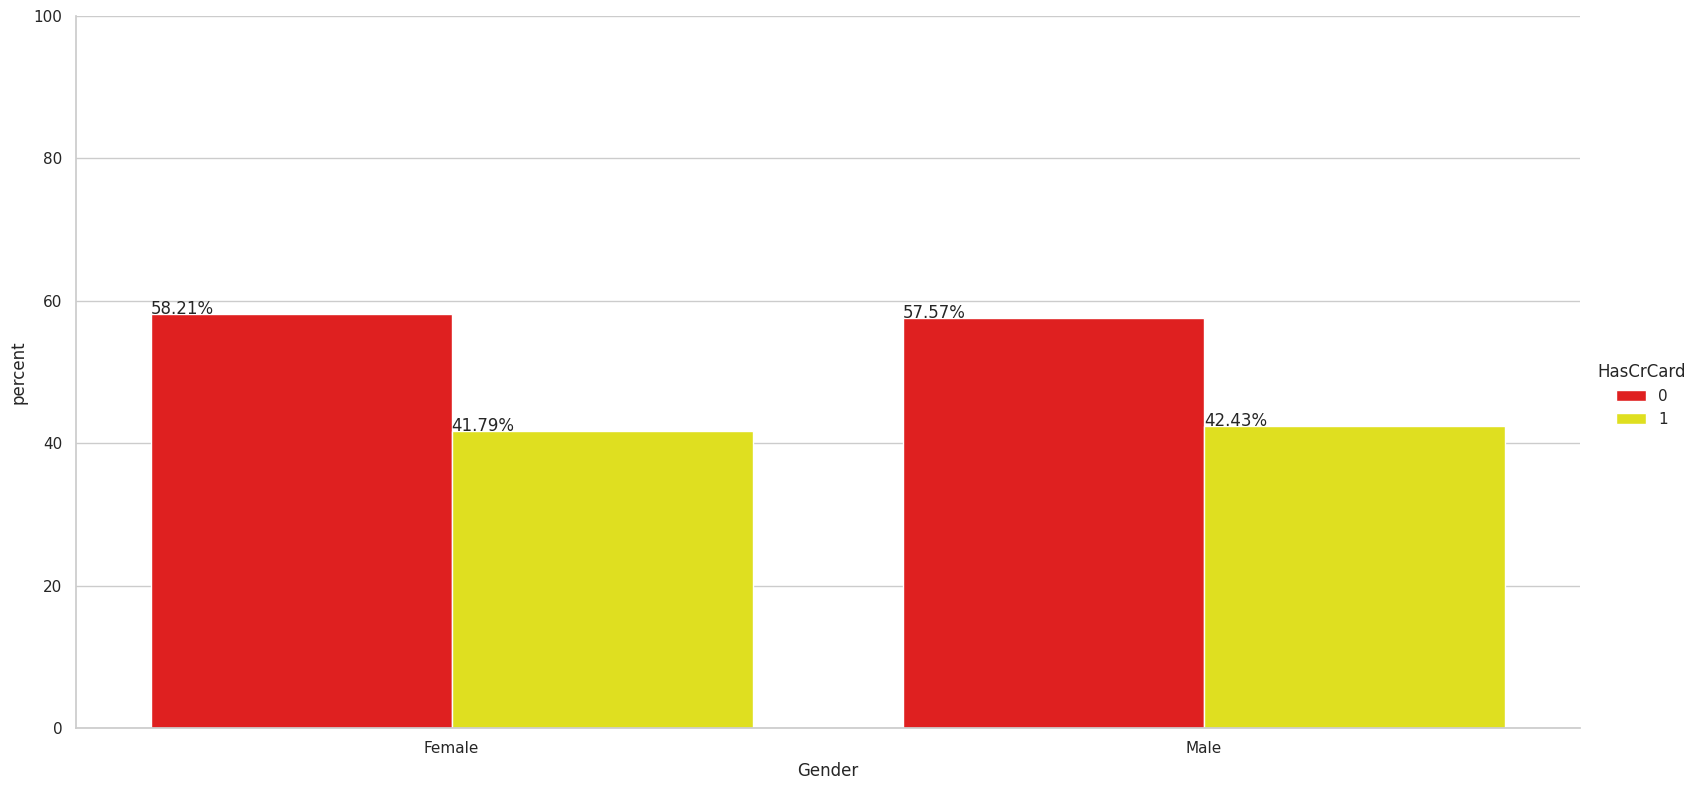

In [30]:
x='Gender'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

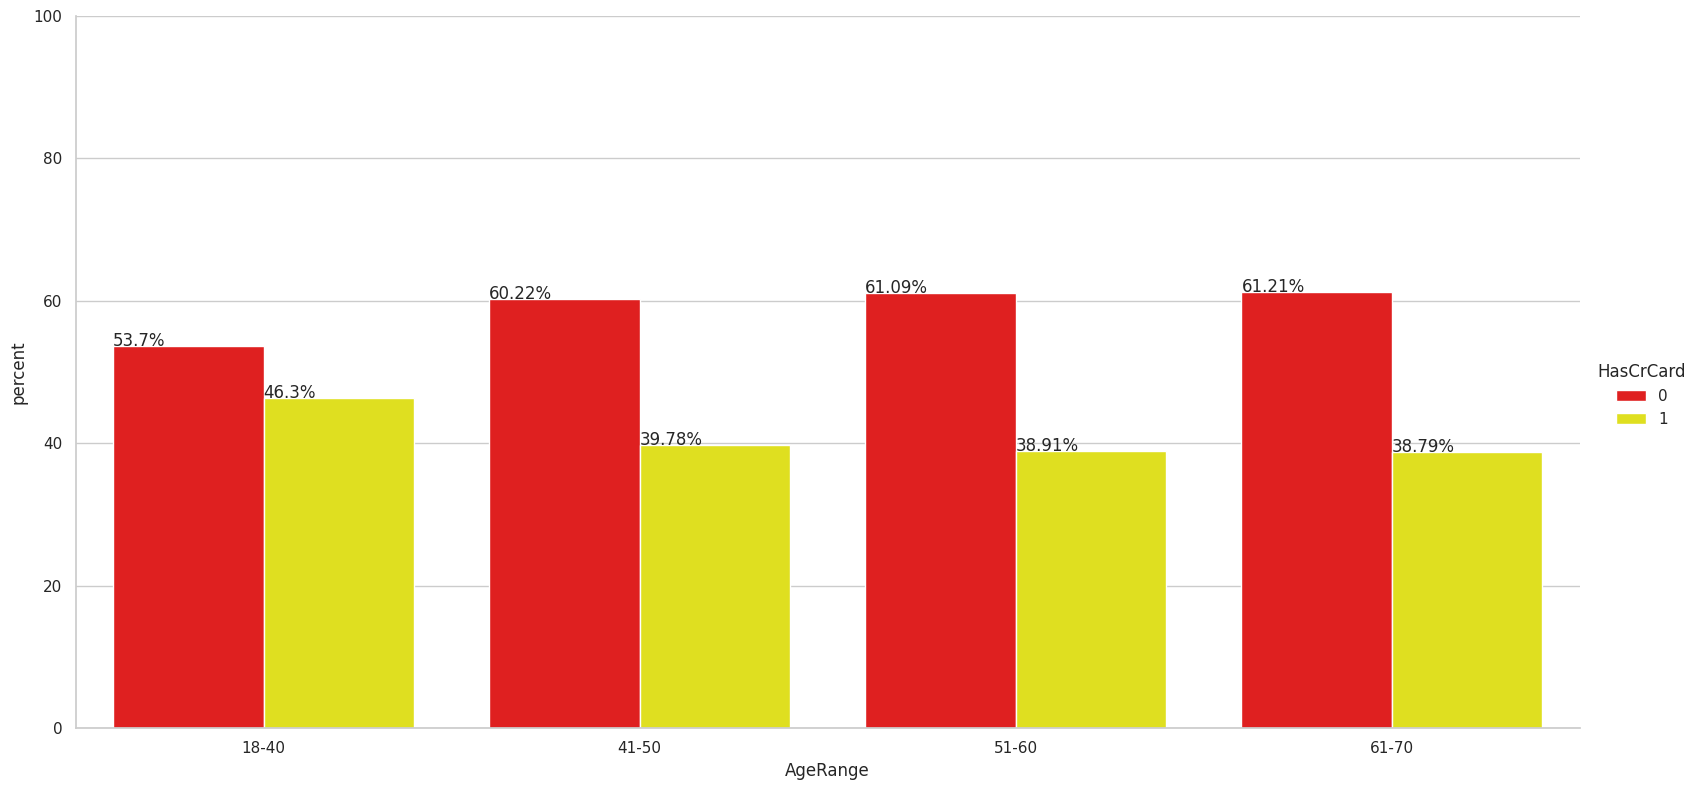

In [31]:
bins = [18, 30, 50, 60, 70]  # Define your age ranges
labels = ['18-40', '41-50', '51-60', '61-70']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
x='AgeRange'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

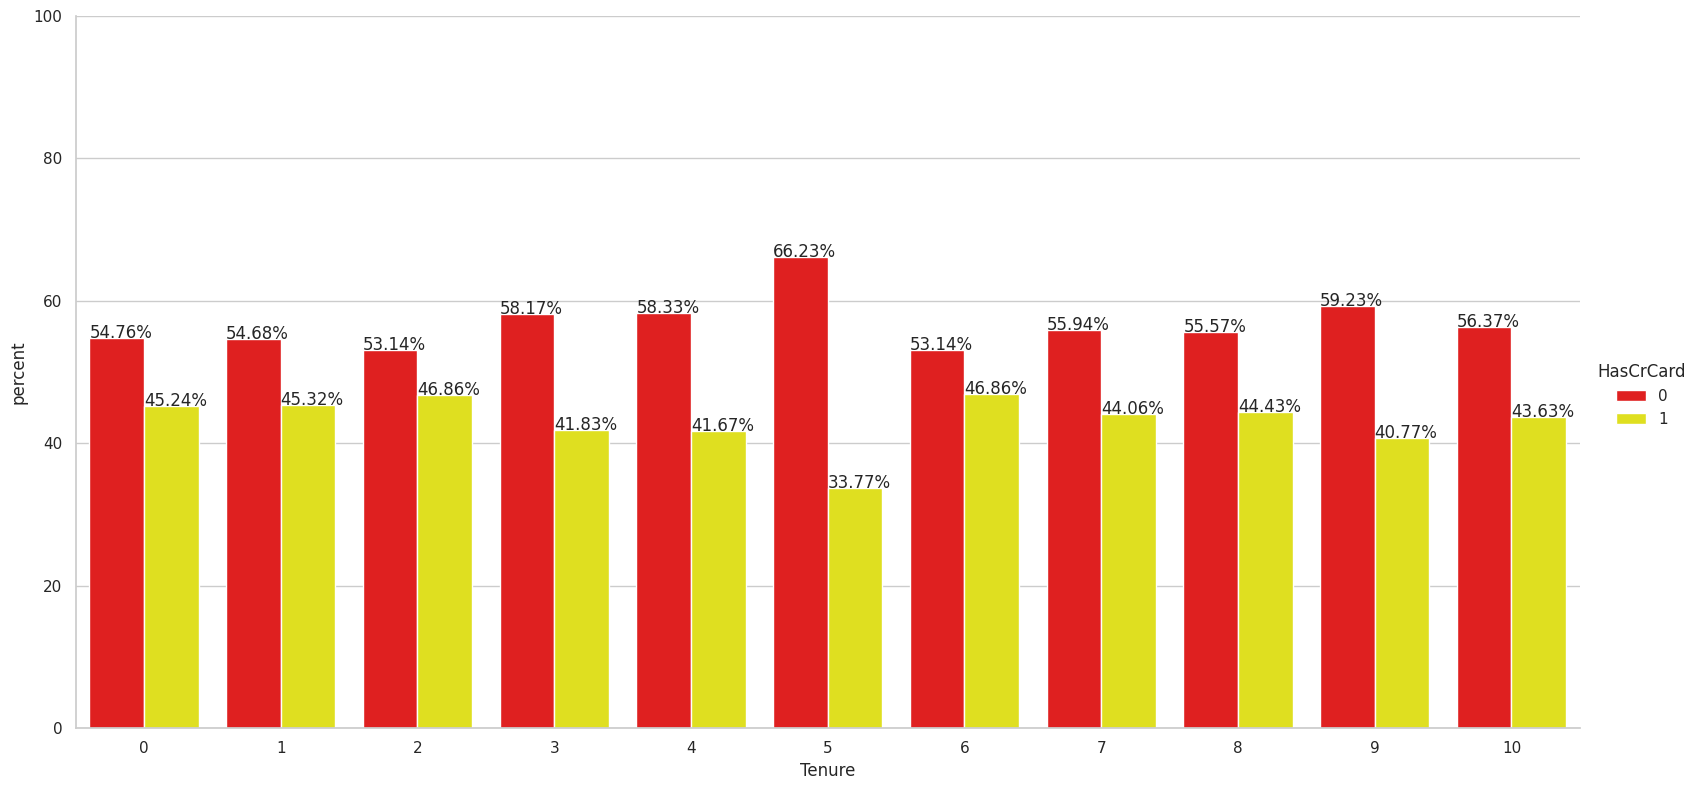

In [32]:
x='Tenure'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

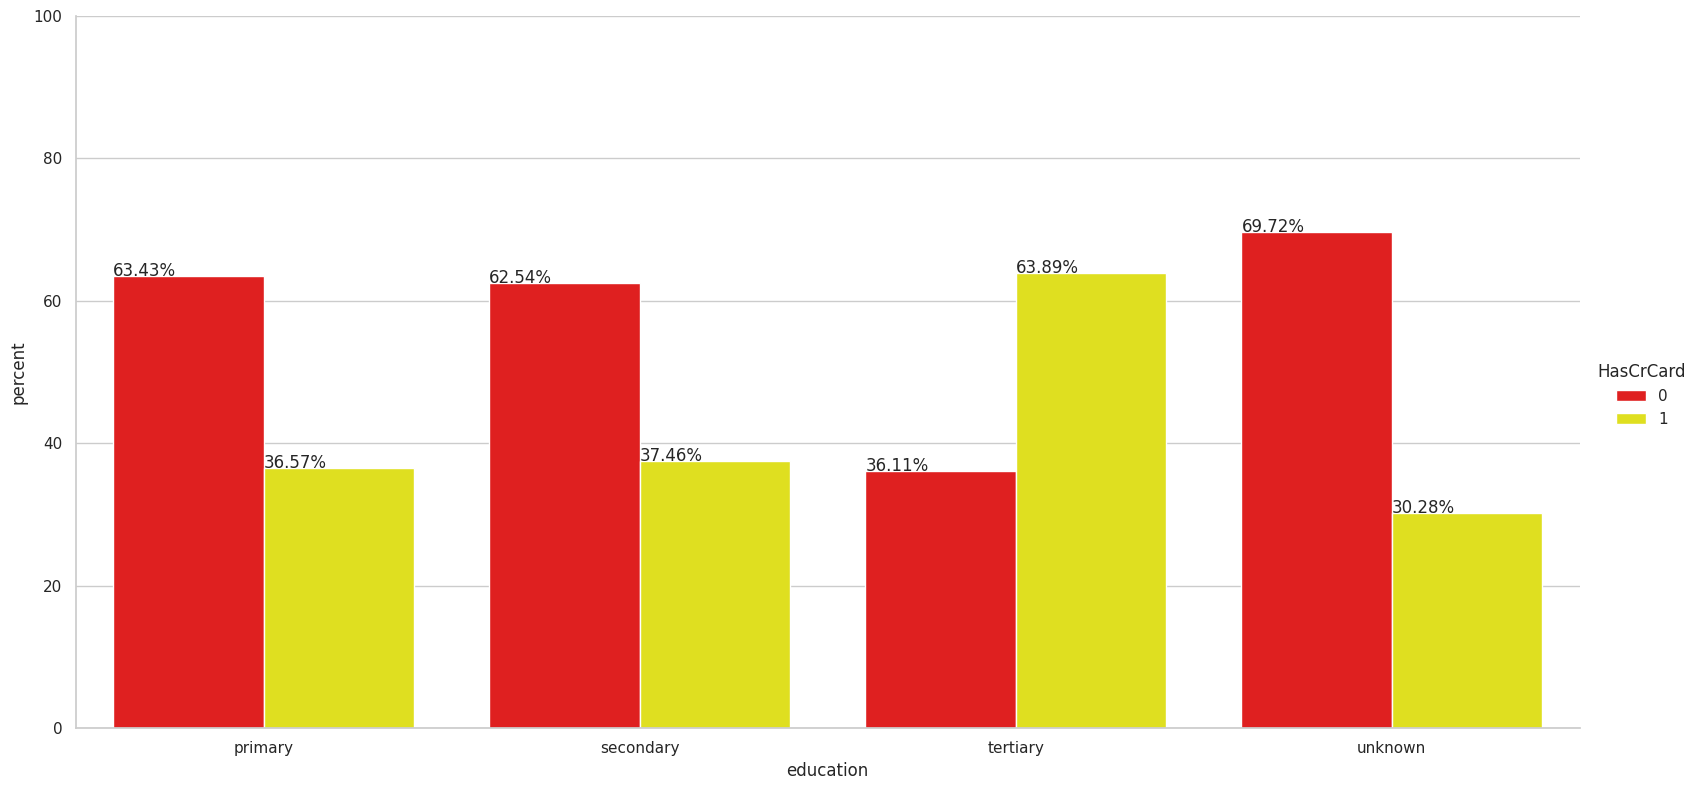

In [33]:
x='education'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

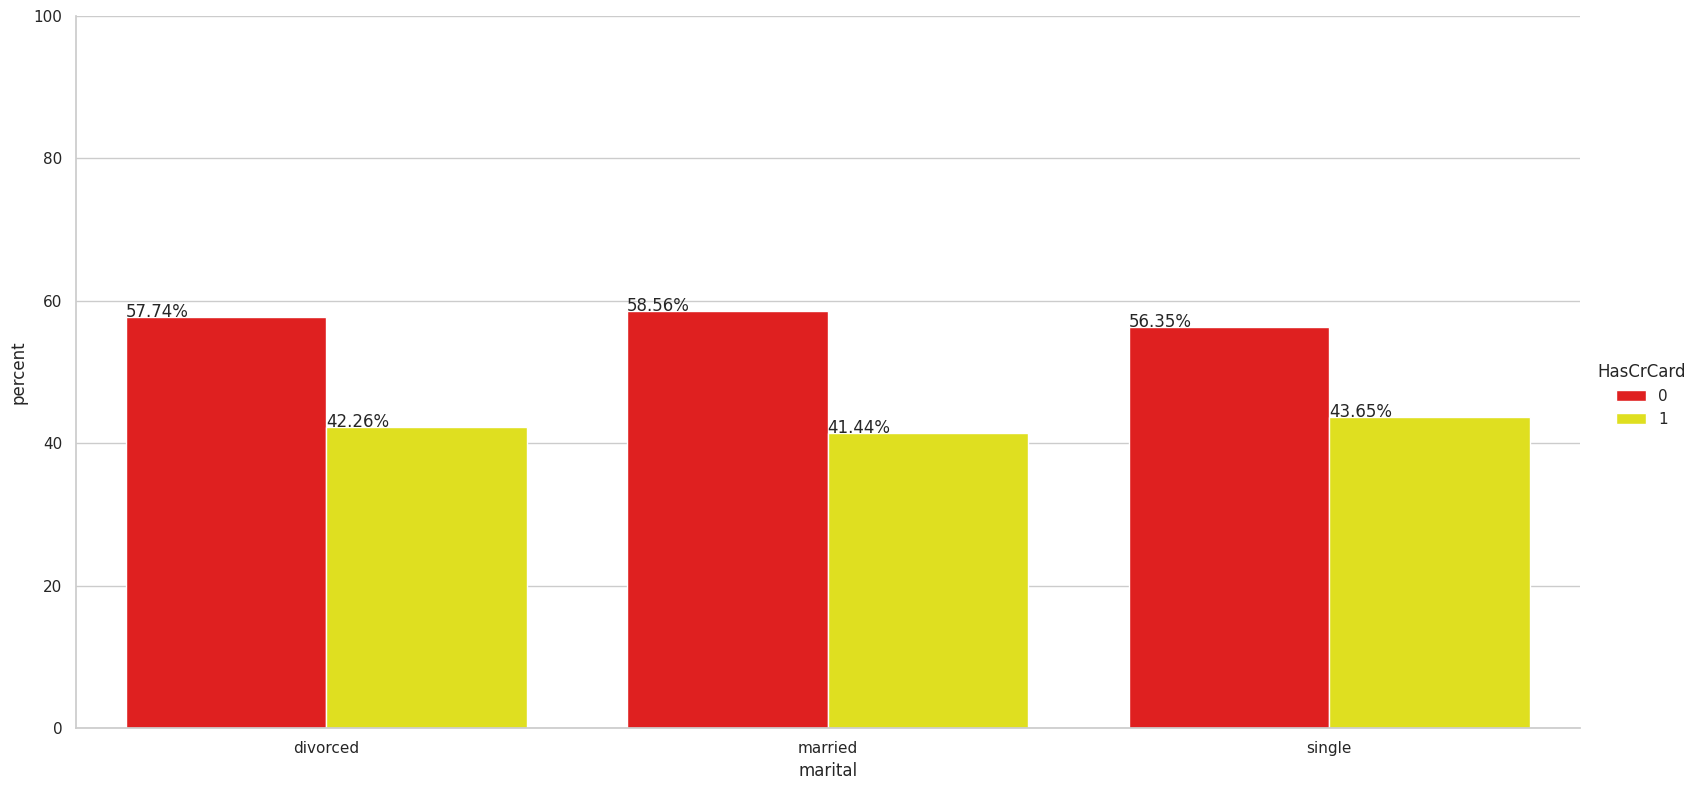

In [34]:
x='marital'
y= 'HasCrCard'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#fig, ax = plt.subplots(figsize=(15,7)) # - adjust figure size

#sns.set(rc={"figure.figsize":(20, 5)})

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

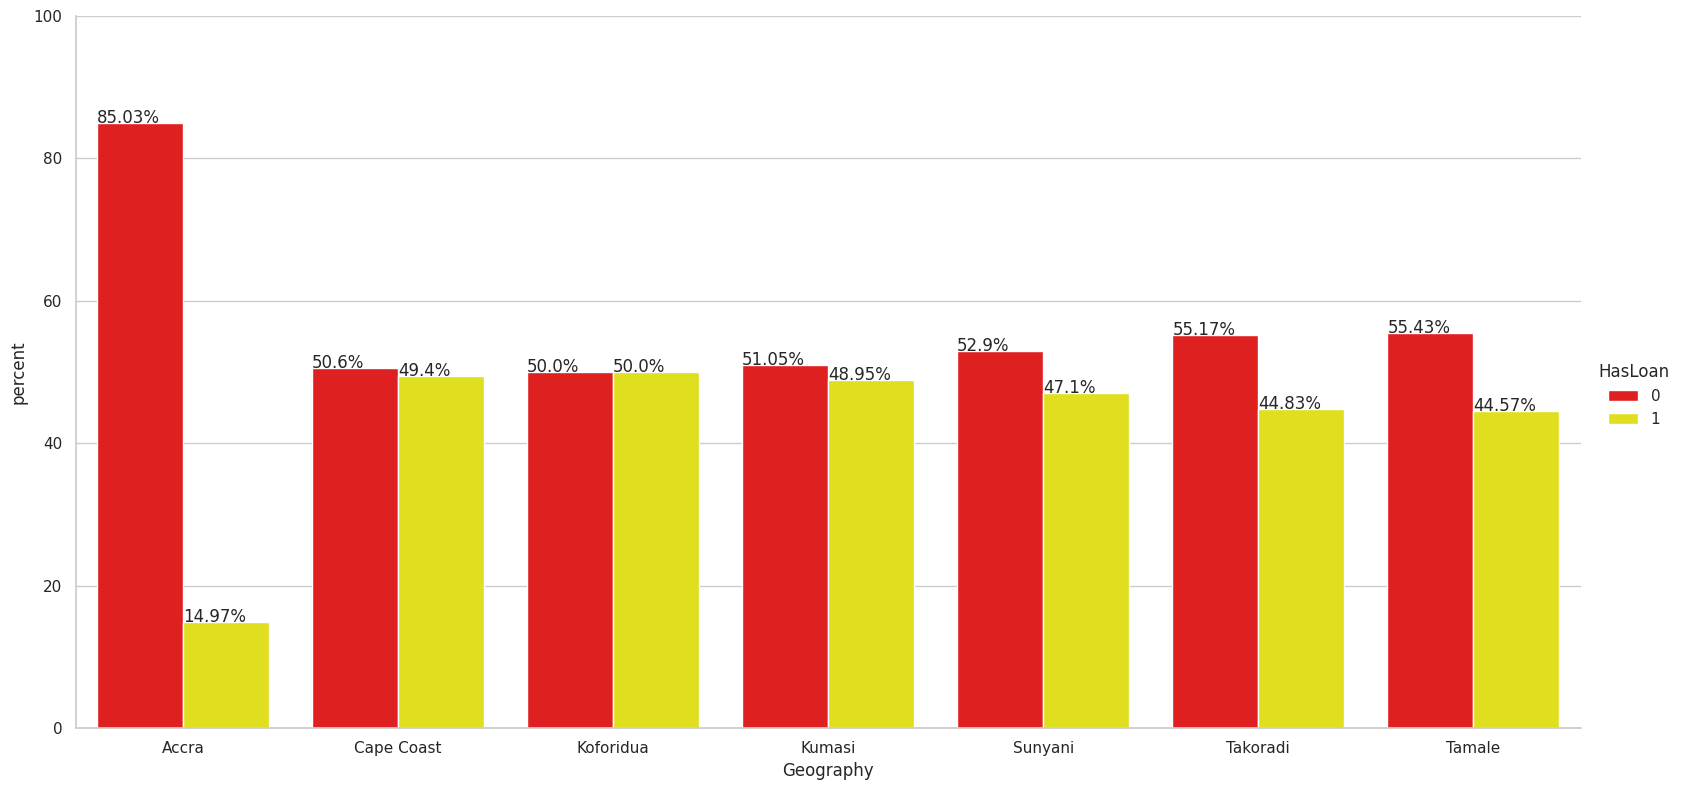

In [35]:
x='Geography'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

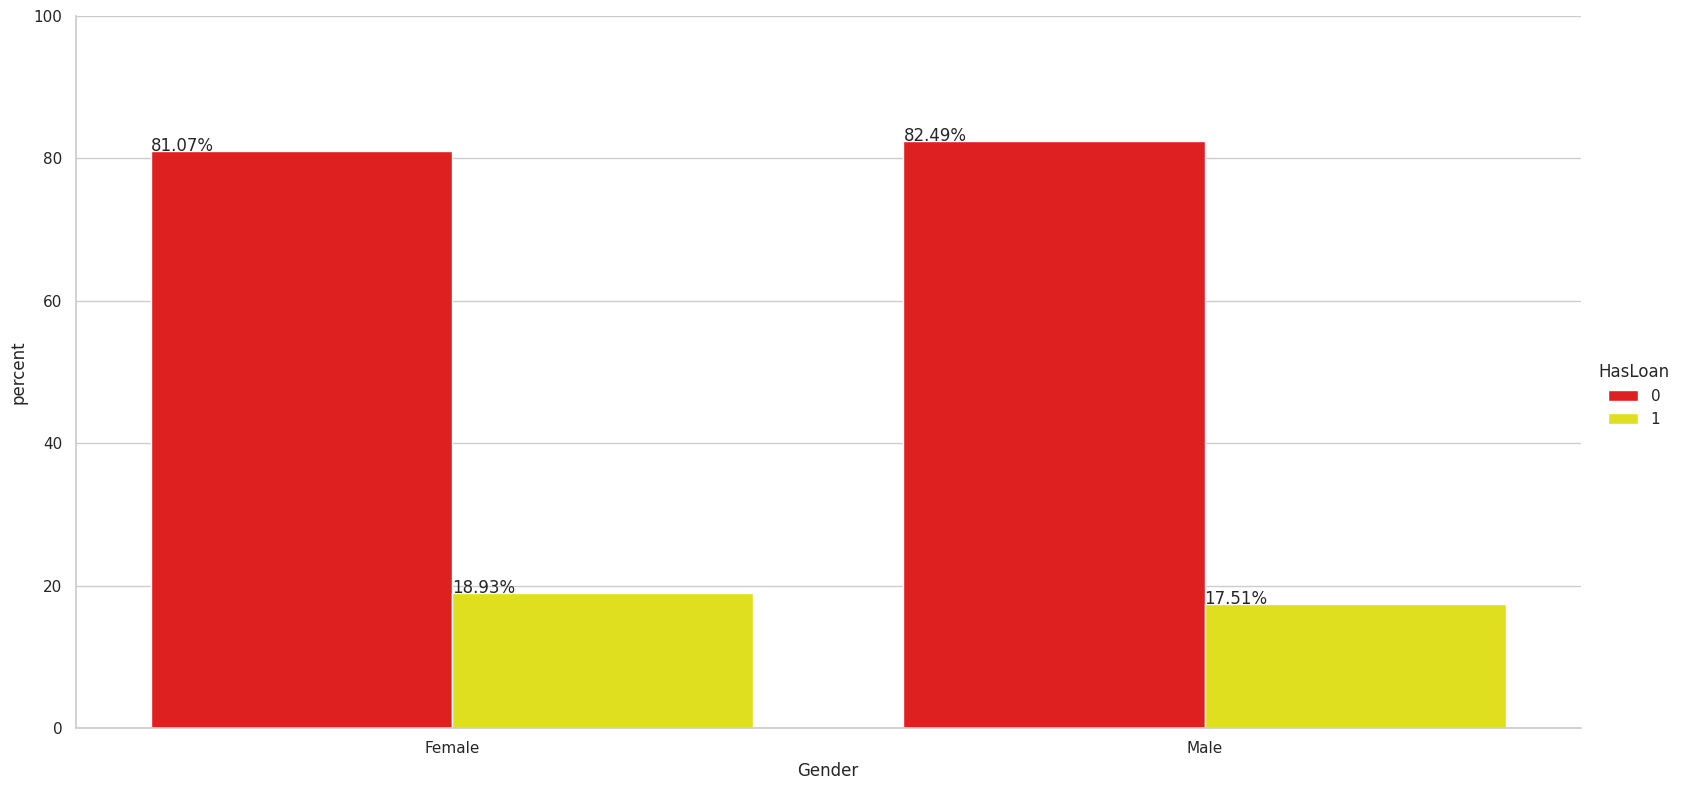

In [36]:
x='Gender'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

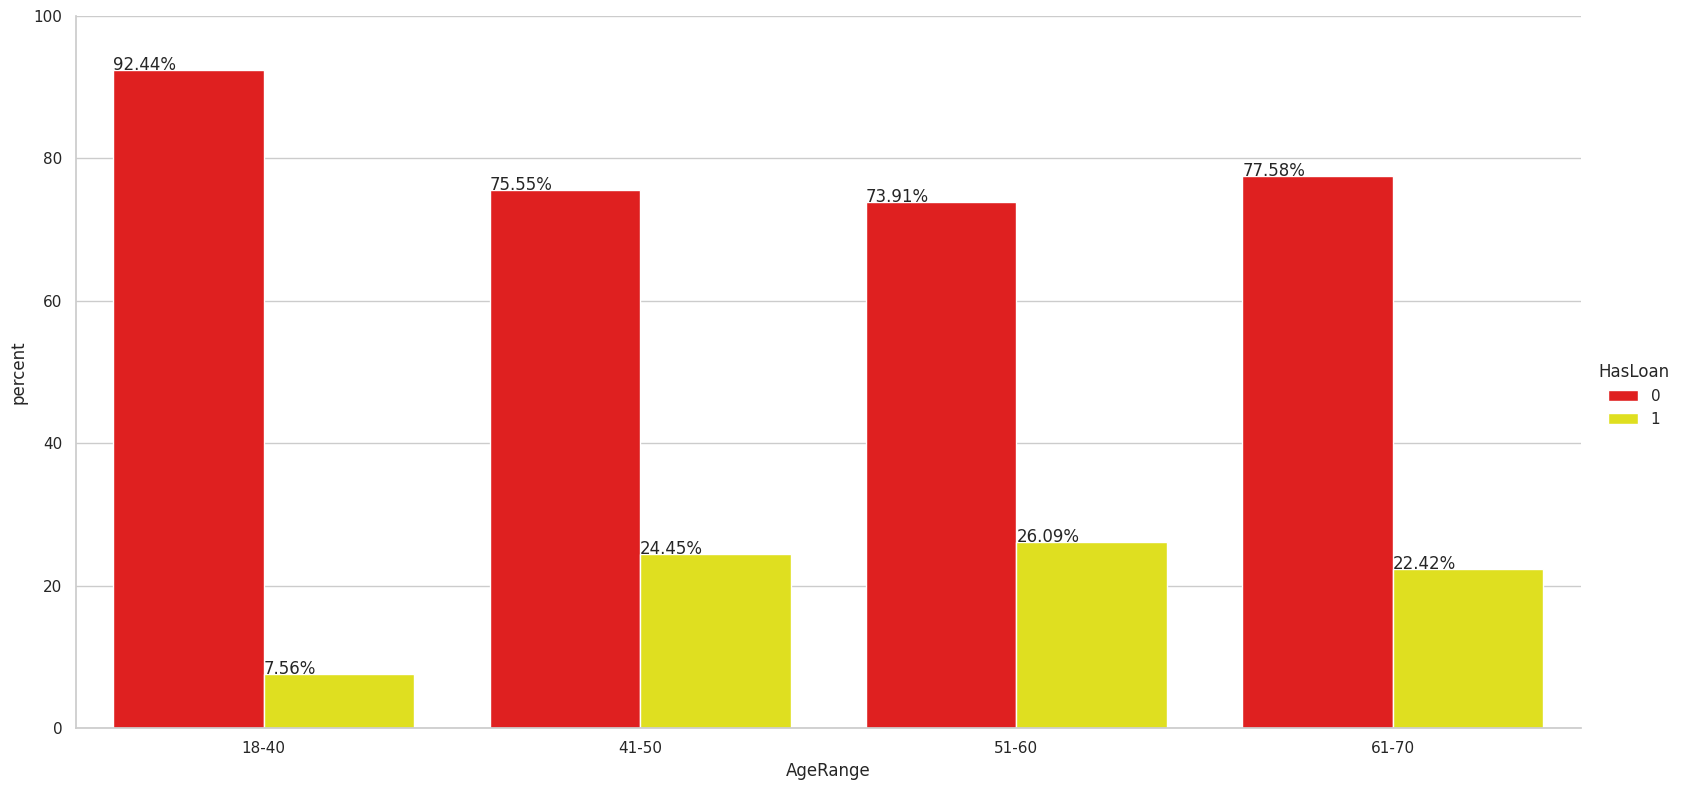

In [37]:
bins = [18, 30, 50, 60, 70]  # Define your age ranges
labels = ['18-40', '41-50', '51-60', '61-70']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
x='AgeRange'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

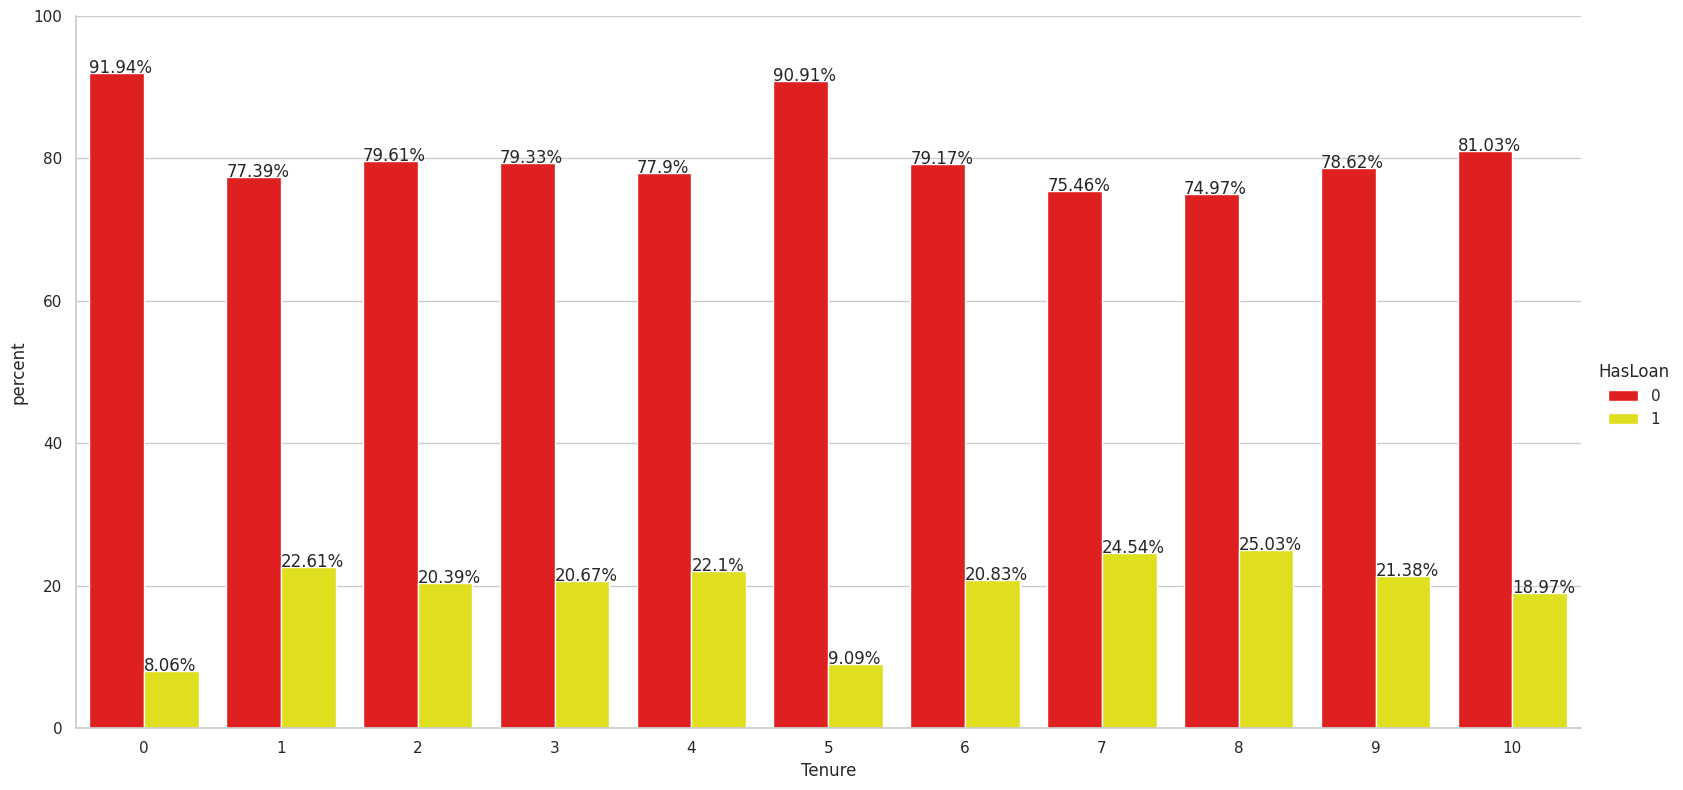

In [38]:
x='Tenure'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

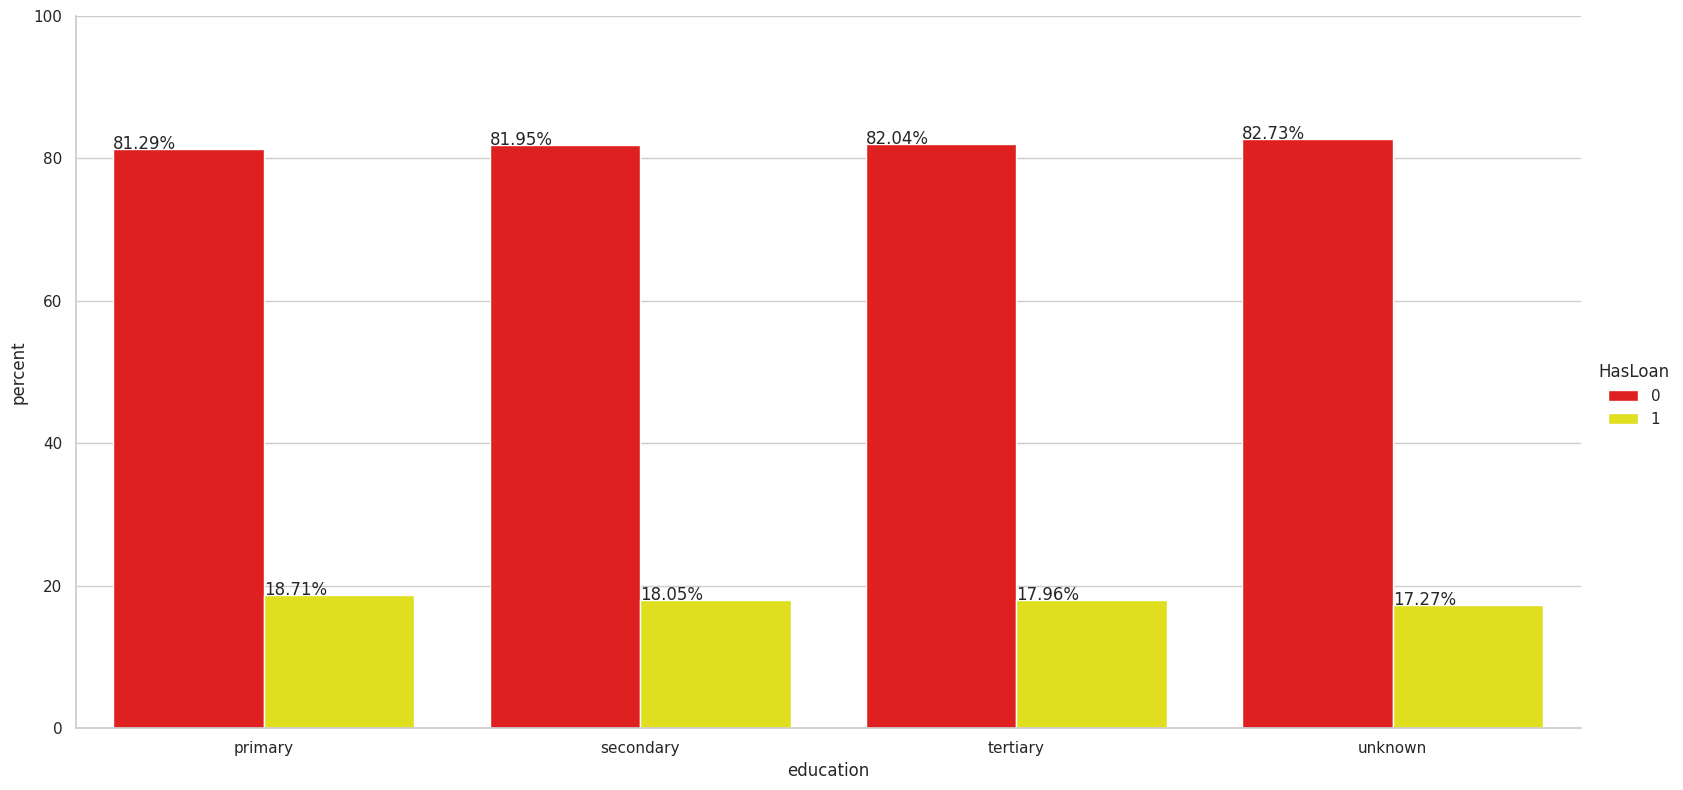

In [39]:
x='education'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

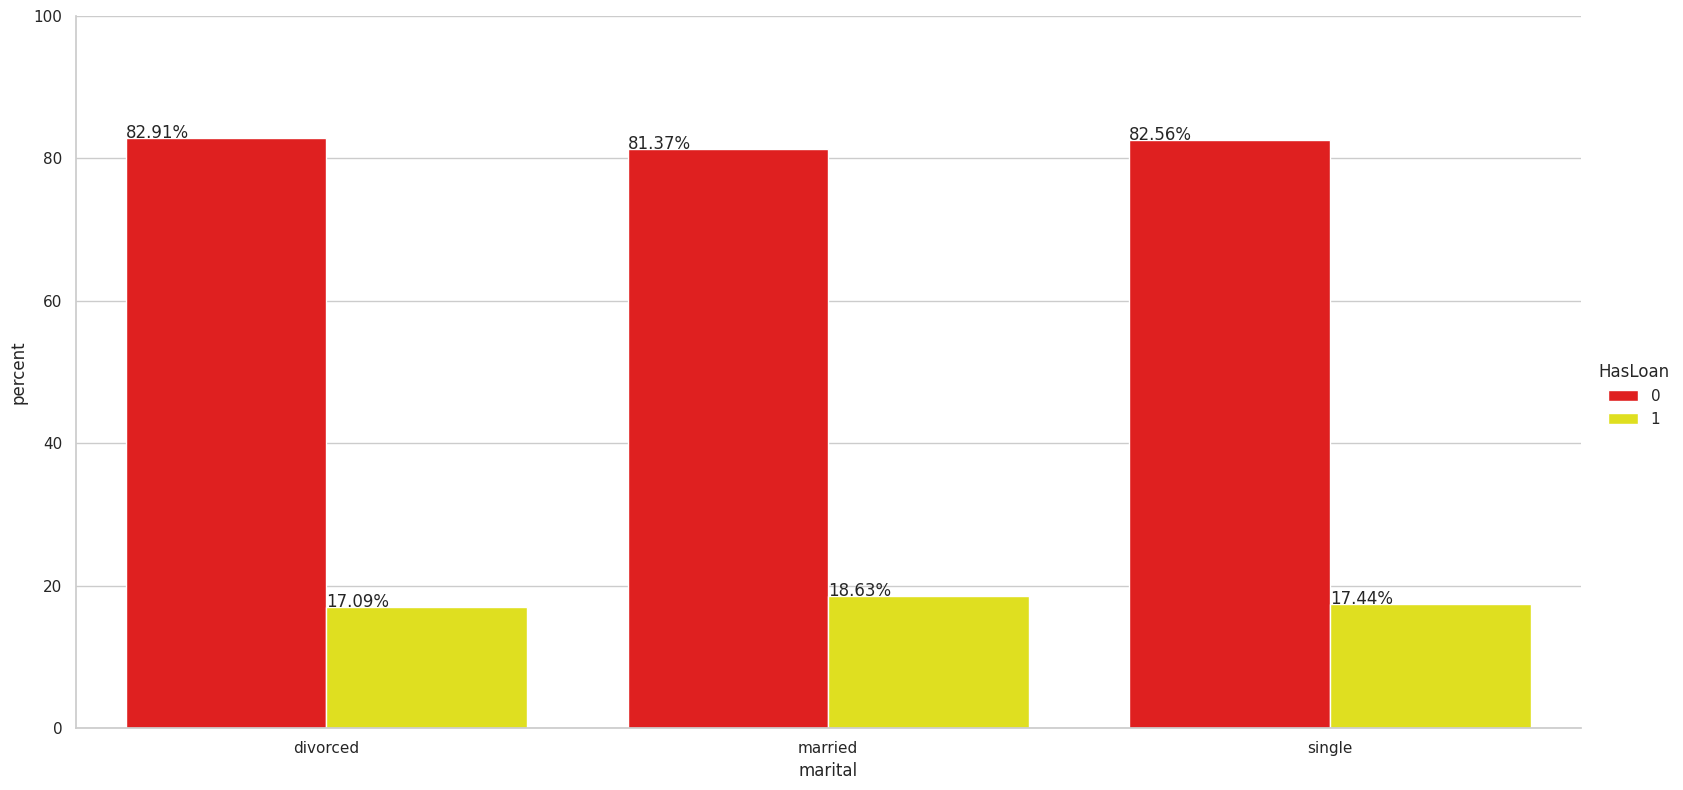

In [40]:
x='marital'
y= 'HasLoan'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

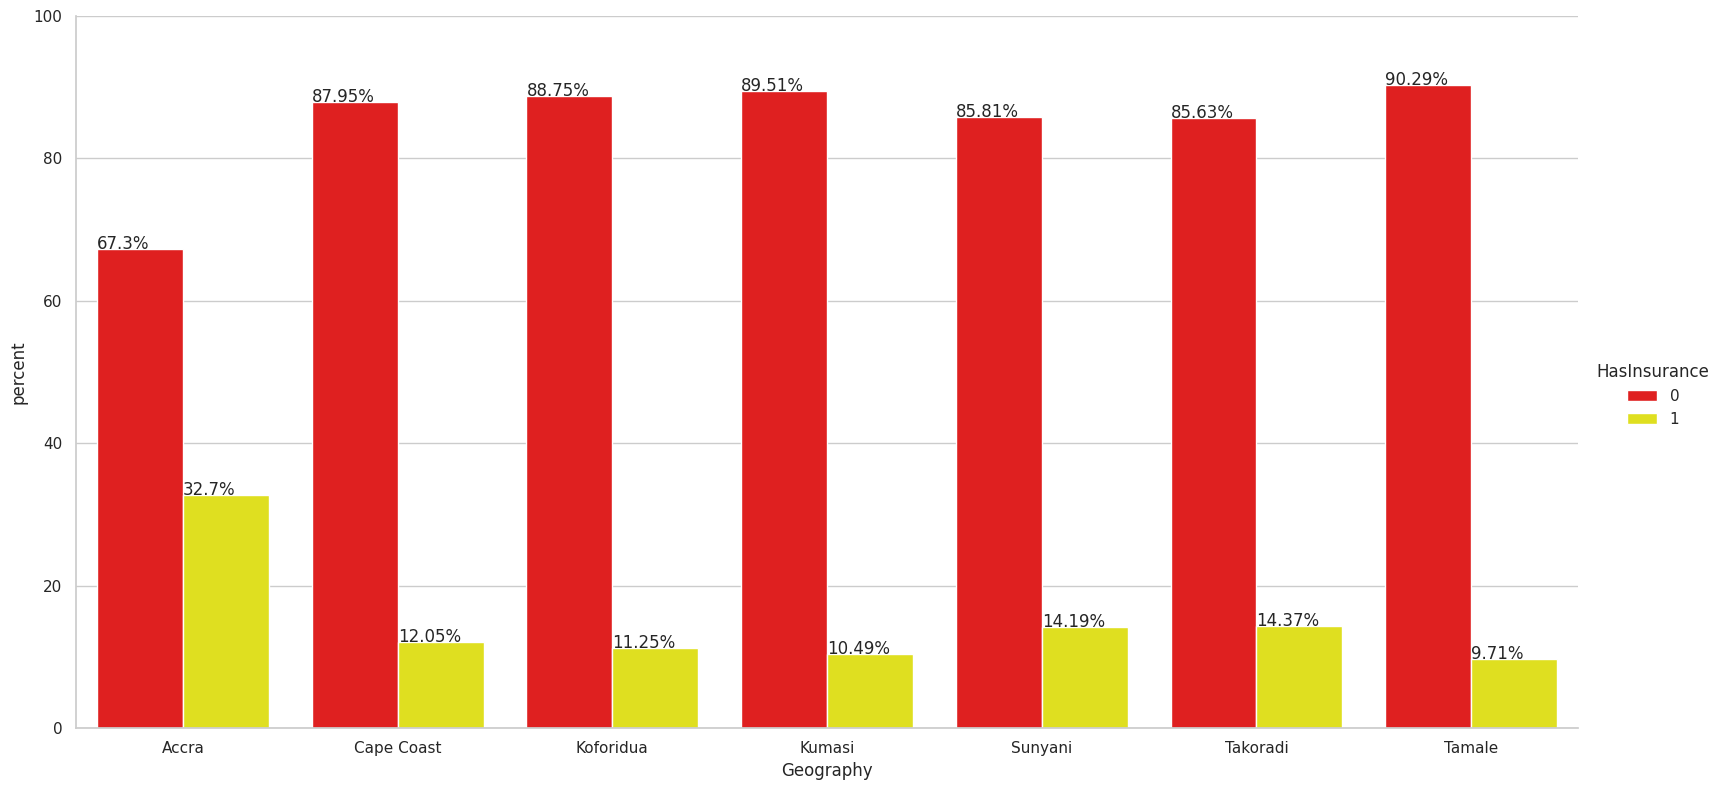

In [41]:
x='Geography'
y= 'HasInsurance'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

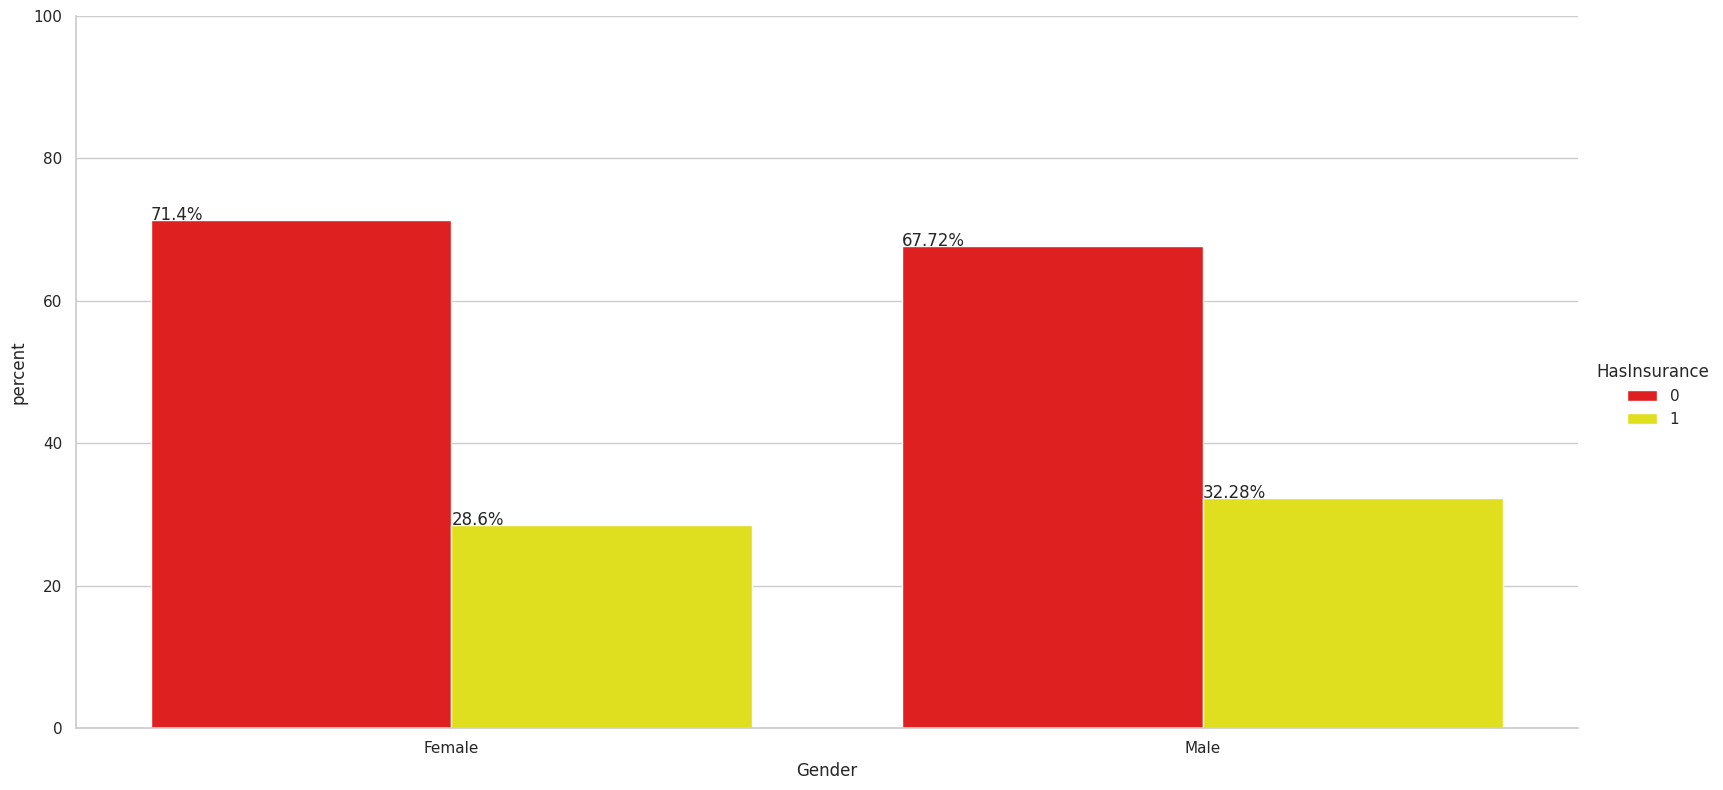

In [42]:
x='Gender'
y= 'HasInsurance'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

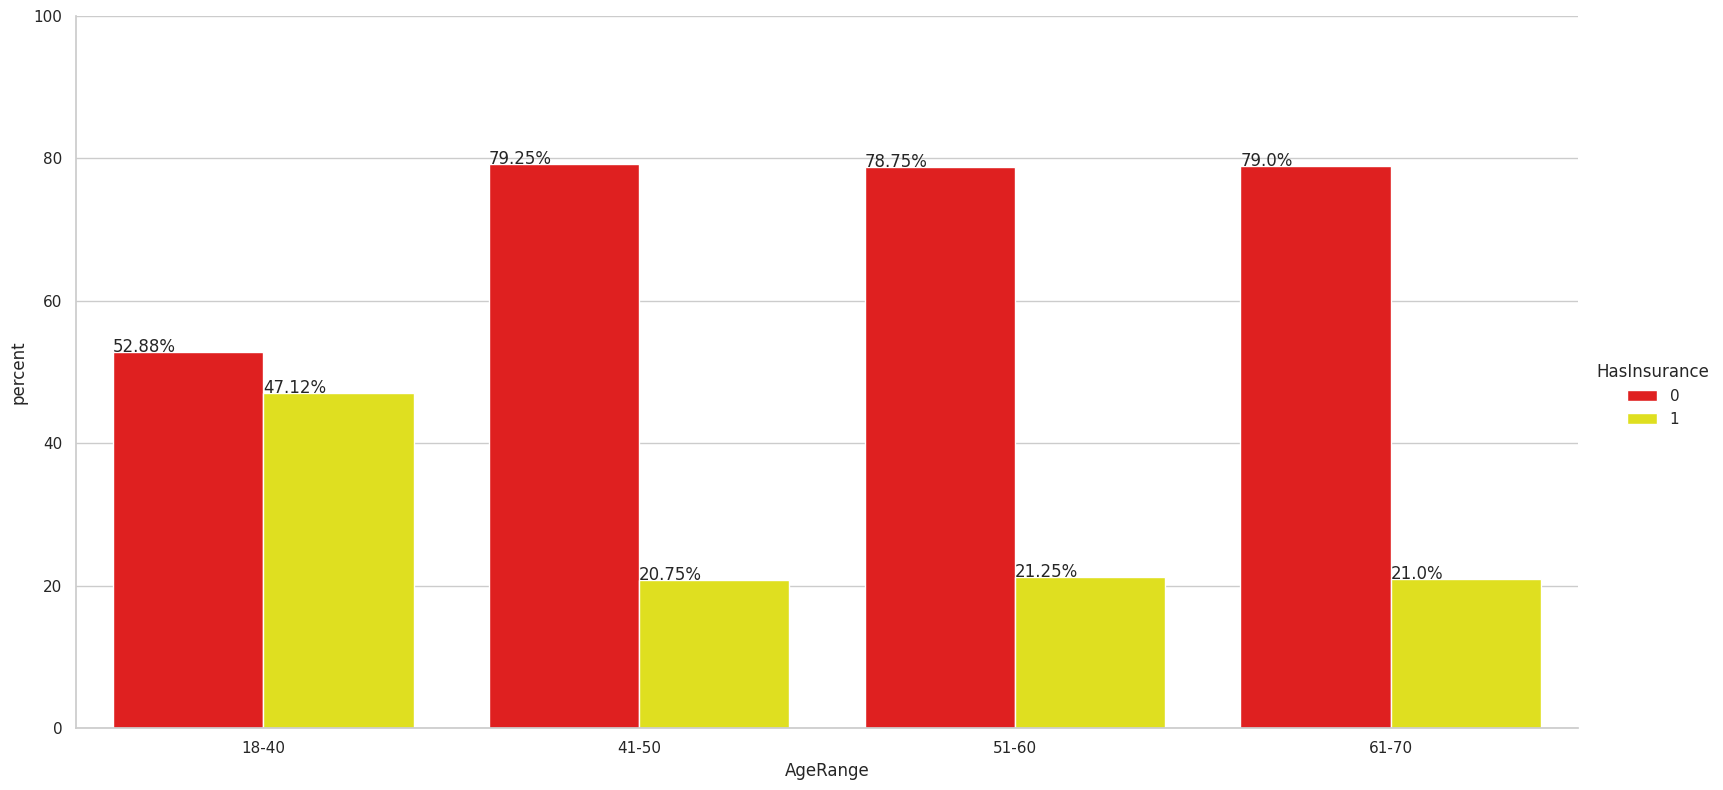

In [43]:
bins = [18, 30, 50, 60, 70]  # Define your age ranges
labels = ['18-40', '41-50', '51-60', '61-70']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
x='AgeRange'
y= 'HasInsurance'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

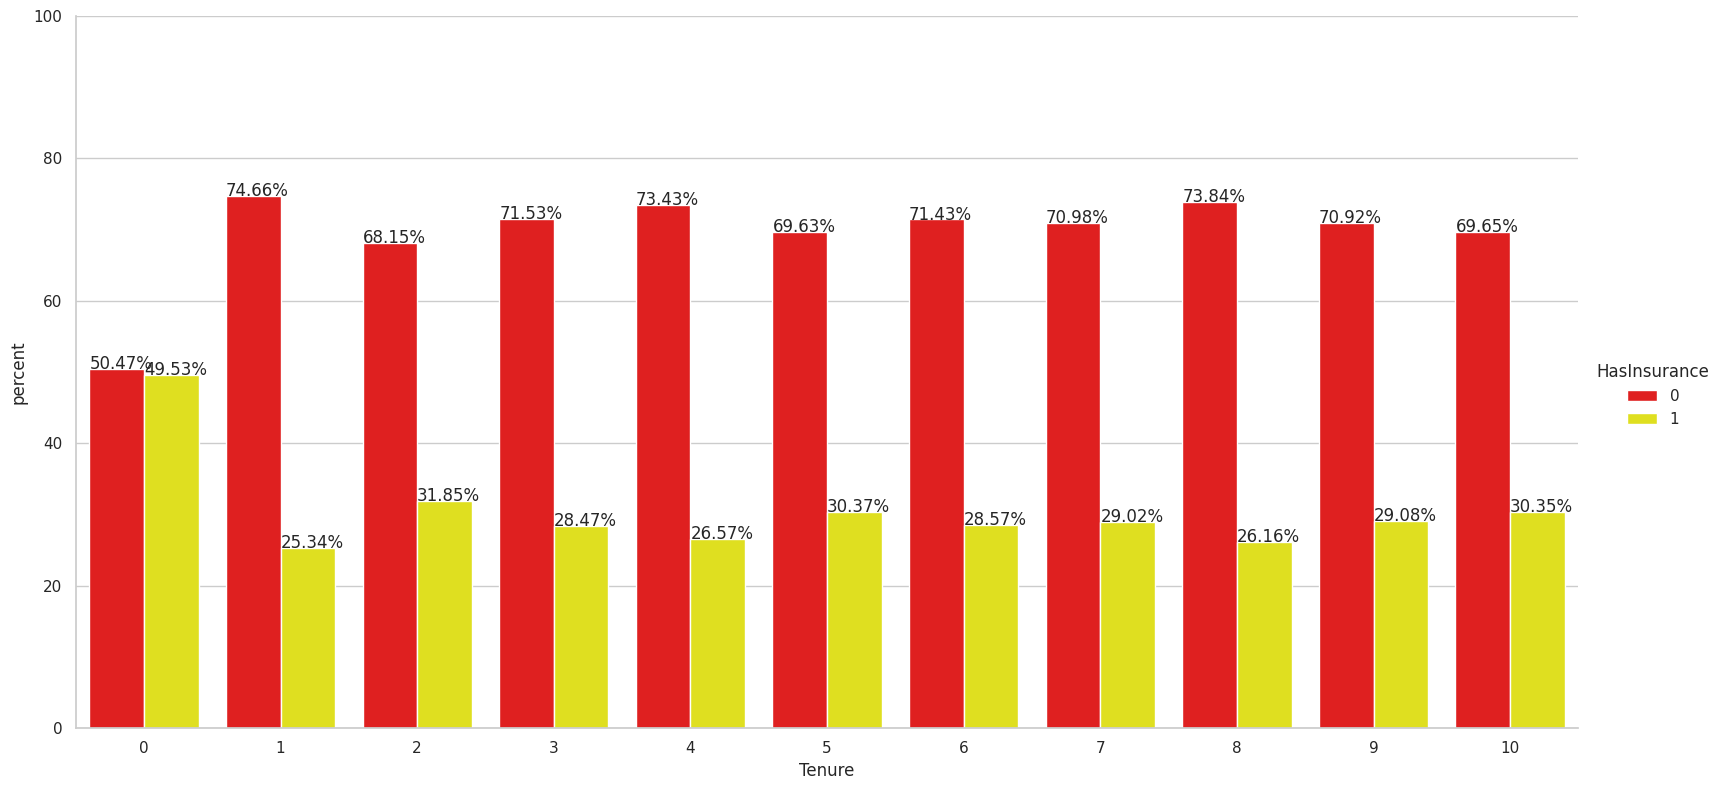

In [44]:
x='Tenure'
y= 'HasInsurance'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

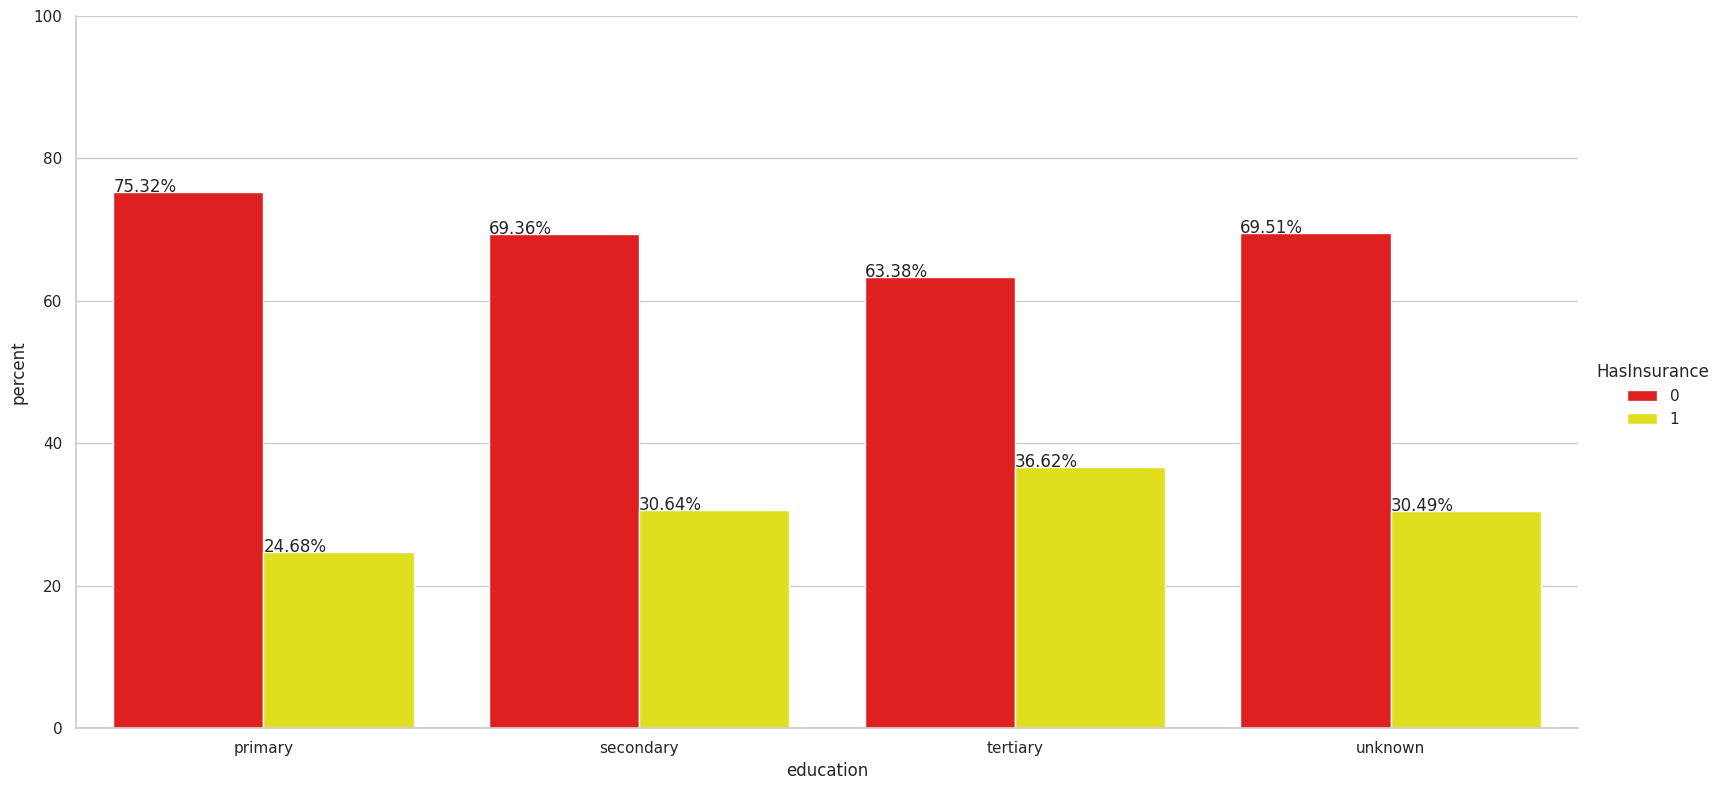

In [45]:
x='education'
y= 'HasInsurance'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,palette=['red', 'yellow'],height=8, aspect=2)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

plt.show()

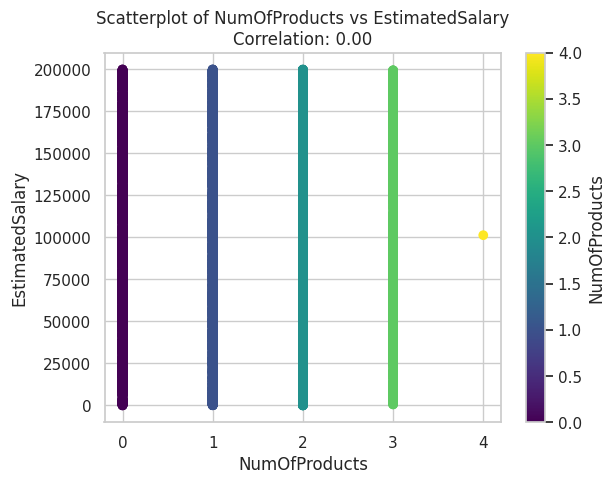

In [46]:

column1 = 'NumOfProducts'  # Replace with your actual column name
column2 = 'EstimatedSalary'  # Replace with your actual column name

# Select only the desired columns
selected_data = df[[column1, column2]]

# Calculate correlation coefficient (optional)
correlation = selected_data.corr().iloc[0, 1]

# Create a scatterplot with color
plt.scatter(selected_data[column1], selected_data[column2], c=selected_data[column1], cmap='viridis')

# Set labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatterplot of {column1} vs {column2}\nCorrelation: {correlation:.2f}')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label(column1)

# Display the plot
plt.show()






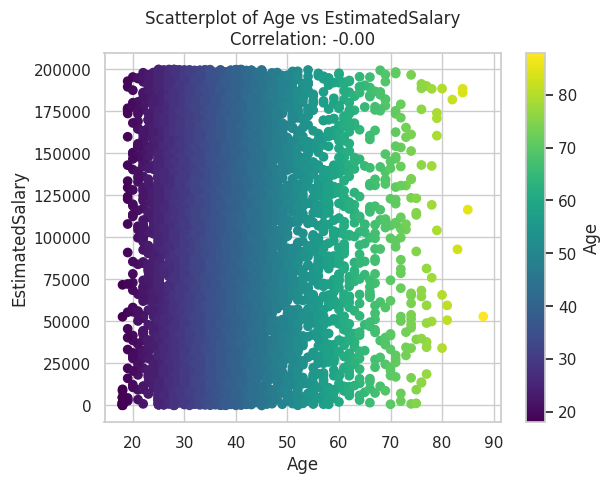

In [47]:
column1 = 'Age'  # Replace with your actual column name
column2 = 'EstimatedSalary'  # Replace with your actual column name

# Select only the desired columns
selected_data = df[[column1, column2]]

# Calculate correlation coefficient (optional)
correlation = selected_data.corr().iloc[0, 1]

# Create a scatterplot with color
plt.scatter(selected_data[column1], selected_data[column2], c=selected_data[column1], cmap='viridis')

# Set labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatterplot of {column1} vs {column2}\nCorrelation: {correlation:.2f}')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label(column1)

# Display the plot
plt.show()

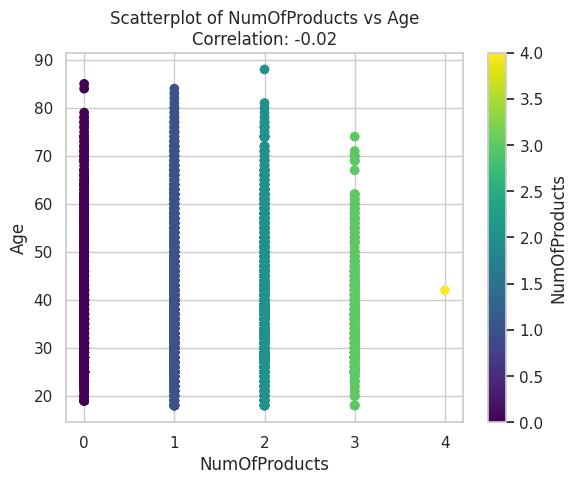

In [48]:
column1 = 'NumOfProducts'  # Replace with your actual column name
column2 = 'Age'  # Replace with your actual column name

# Select only the desired columns
selected_data = df[[column1, column2]]

# Calculate correlation coefficient (optional)
correlation = selected_data.corr().iloc[0, 1]

# Create a scatterplot with color
plt.scatter(selected_data[column1], selected_data[column2], c=selected_data[column1], cmap='viridis')

# Set labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatterplot of {column1} vs {column2}\nCorrelation: {correlation:.2f}')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label(column1)

# Display the plot
plt.show()

In [49]:
categorical_columns = ['education', 'Geography', 'Gender','marital']

# Convert multiple categorical columns into dummy variables
df_dummies = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

In [50]:
df_dummies.shape

(10000, 29)

In [51]:
df_dummies.drop(['AgeRange'], inplace=True,axis=1)

In [52]:
df_dummies.head(10)

,RowNumber,CustomerId,Surname,Age,Tenure,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,...,Geography_Koforidua,Geography_Kumasi,Geography_Sunyani,Geography_Takoradi,Geography_Tamale,Gender_Female,Gender_Male,marital_divorced,marital_married,marital_single
0,1,15634602,Hargrave,42,2,1,101348.88,1,1,1,...,0,0,0,1,0,1,0,0,1,0
1,2,15647311,Hill,41,1,1,112542.58,0,0,1,...,0,0,0,1,0,1,0,0,0,1
2,3,15619304,Onio,42,8,0,113931.57,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,4,15701354,Boni,39,1,0,93826.63,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,5,15737888,Mitchell,43,2,1,79084.10,1,0,0,...,0,0,0,1,0,1,0,0,0,1
5,6,15574012,Chu,44,8,0,149756.71,0,0,1,...,1,0,0,0,0,0,1,0,1,0
6,7,15592531,Bartlett,50,7,1,10062.80,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7,8,15656148,Obinna,29,4,0,119346.88,1,0,1,...,0,0,1,0,0,1,0,1,0,0
8,9,15792365,He,44,4,1,74940.50,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9,10,15592389,H?,27,2,1,71725.73,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [53]:
df_dummies.to_excel('output_file.xlsx', index=False)

In [54]:
df_dummies.shape

(10000, 28)

In [55]:
X = df_dummies.iloc[:, 4:28].values
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)

In [56]:
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])

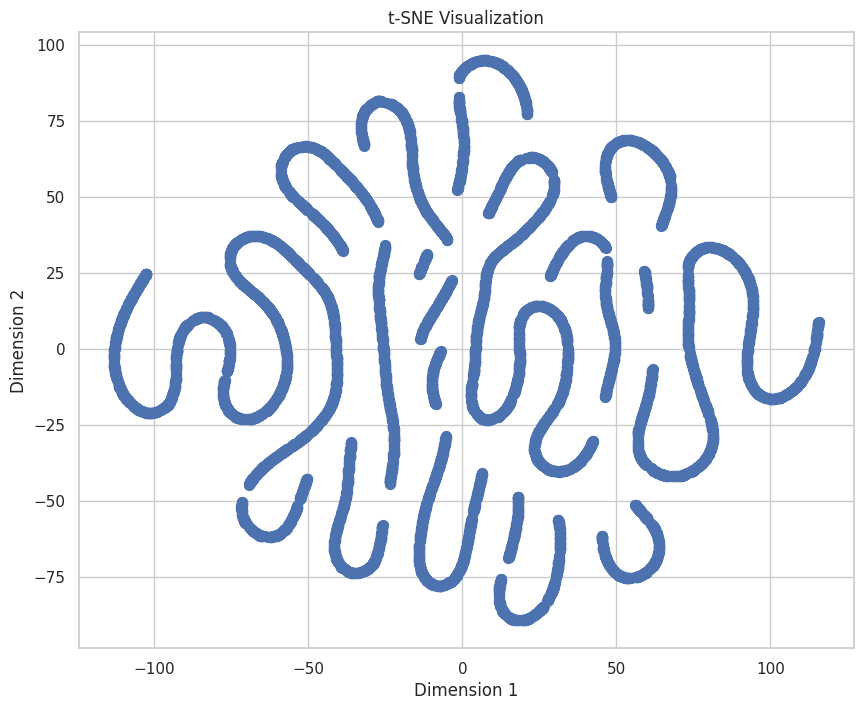

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], marker='o', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [58]:
umap_model = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(X)

In [59]:
df_umap = pd.DataFrame(data=X_umap, columns=['Dimension 1', 'Dimension 2'])

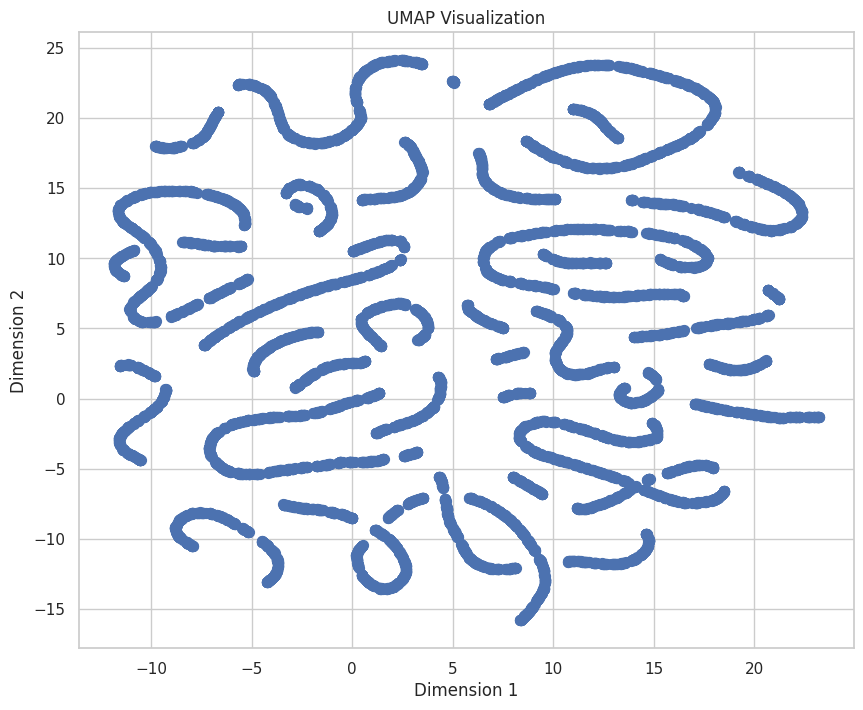

In [60]:
plt.figure(figsize=(10, 8))
plt.scatter(df_umap['Dimension 1'], df_umap['Dimension 2'], marker='o', s=50)
plt.title('UMAP Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [61]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

In [62]:
df_pca = pd.DataFrame(data=X_pca, columns=['Dimension 1', 'Dimension 2'])

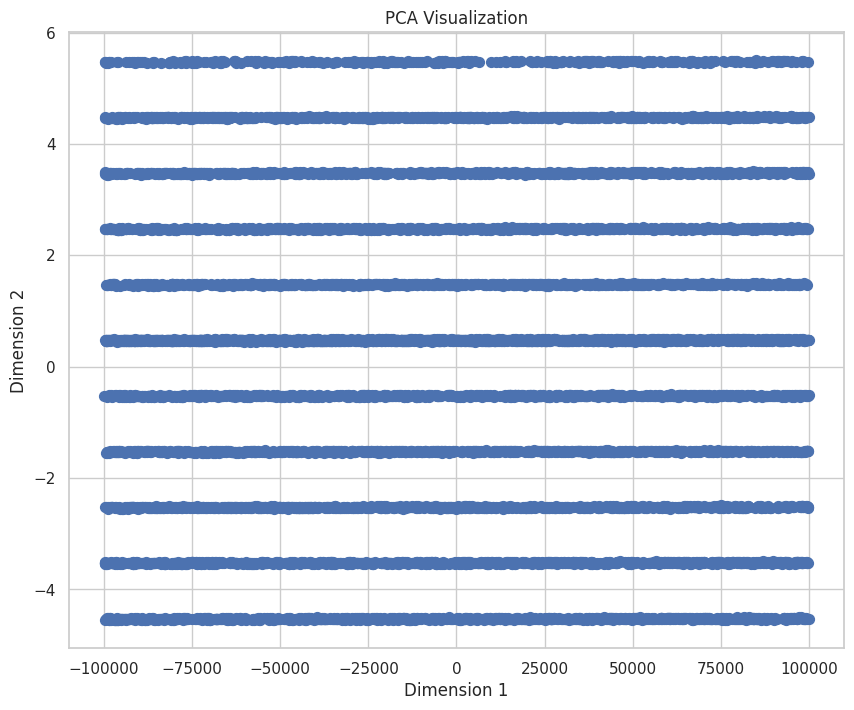

In [63]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Dimension 1'], df_pca['Dimension 2'], marker='o', s=50)
plt.title('PCA Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

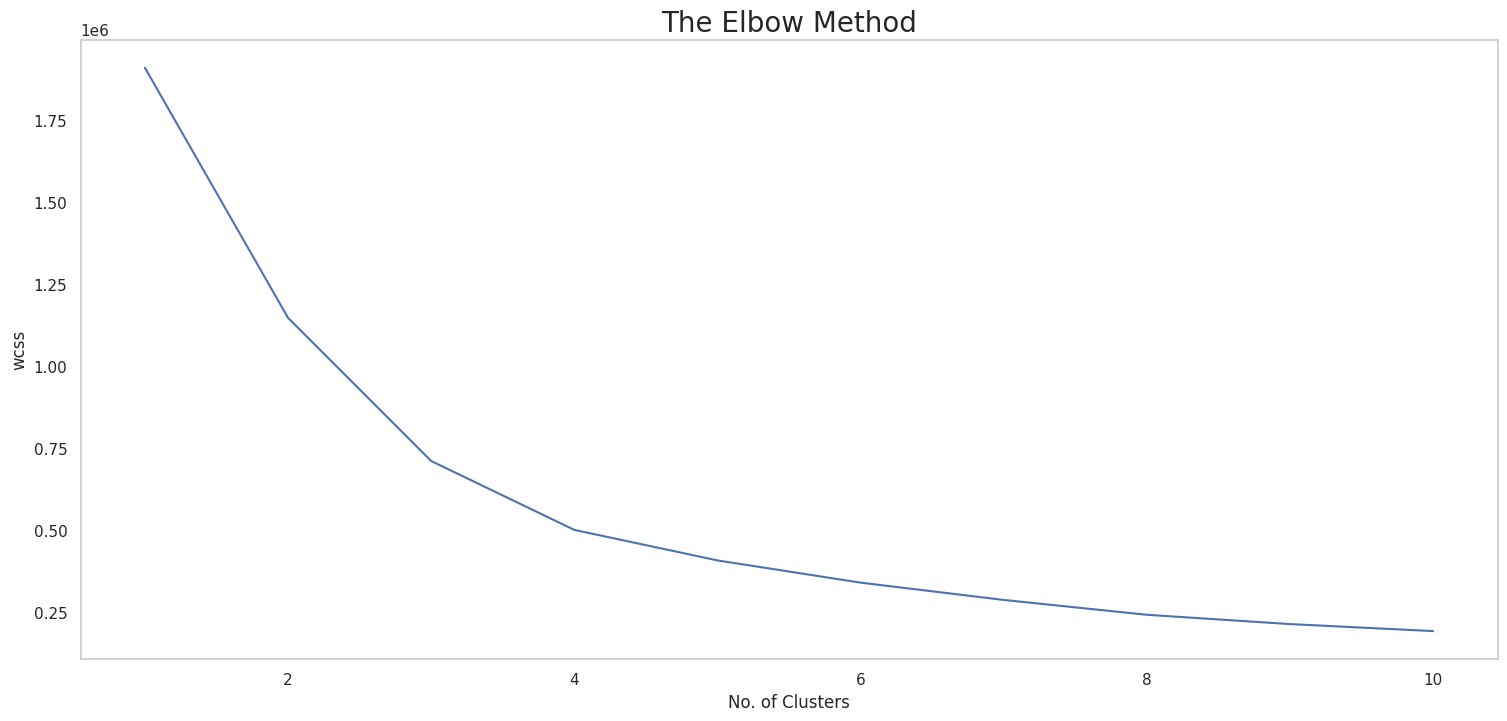

In [64]:
# Region vs Traffic Type
x = df_umap
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i,
  init = 'k-means++',
  max_iter = 300,
  n_init = 10,
  random_state = 0,
  algorithm = 'elkan',
  tol = 0.001)
  km.fit(x)
  labels = km.labels_
  wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [65]:
num_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_umap['Cluster'] = kmeans.fit_predict(X_umap)

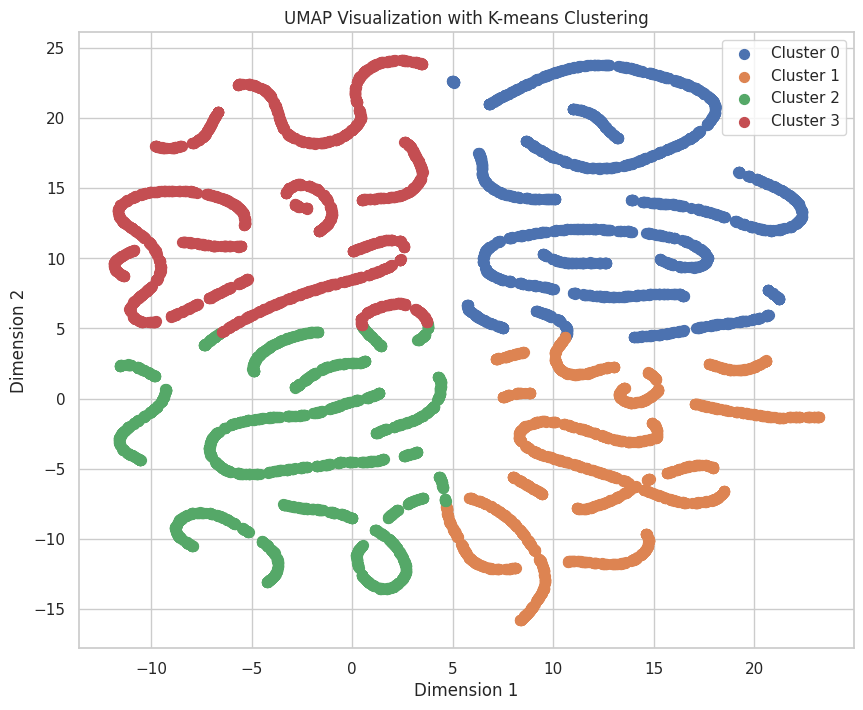

In [66]:
plt.figure(figsize=(10, 8))

# Plot each cluster separately
for cluster_label in range(num_clusters):
    cluster_data = df_umap[df_umap['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['Dimension 1'],
        cluster_data['Dimension 2'],
        label=f'Cluster {cluster_label}',
        marker='o',
        s=50
    )

plt.title('UMAP Visualization with K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [67]:
df_umap.head()

,Dimension 1,Dimension 2,Cluster
0,5.953412,-7.130035,1
1,-3.901346,-10.983187,2
2,-5.899616,-8.899508,2
3,4.723189,-7.965440,1
4,14.545781,-6.520497,1


In [68]:
df_umap['Cluster']

0       1
1       2
2       2
3       1
4       1
       ..
9995    1
9996    2
9997    0
9998    1
9999    0
Name: Cluster, Length: 10000, dtype: int32

In [69]:
df.head()

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts,AgeRange
0,1,15634602,Hargrave,tertiary,Takoradi,Female,42,2,married,1,101348.88,1,1,1,1,4,41-50
1,2,15647311,Hill,secondary,Takoradi,Female,41,1,single,1,112542.58,0,0,1,1,2,41-50
2,3,15619304,Onio,secondary,Sunyani,Female,42,8,married,0,113931.57,0,0,0,0,0,41-50
3,4,15701354,Boni,unknown,Sunyani,Female,39,1,married,0,93826.63,1,0,0,0,1,41-50
4,5,15737888,Mitchell,unknown,Takoradi,Female,43,2,single,1,79084.10,1,0,0,0,1,41-50


In [70]:
df.cluster = pd.concat([df,df_umap['Cluster']])


In [71]:
df1 = df

In [72]:
df1['clusters'] = df_umap['Cluster']

In [73]:
df.cluster.shape


(20000, 18)

In [74]:
df1.head()

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts,AgeRange,clusters
0,1,15634602,Hargrave,tertiary,Takoradi,Female,42,2,married,1,101348.88,1,1,1,1,4,41-50,1
1,2,15647311,Hill,secondary,Takoradi,Female,41,1,single,1,112542.58,0,0,1,1,2,41-50,2
2,3,15619304,Onio,secondary,Sunyani,Female,42,8,married,0,113931.57,0,0,0,0,0,41-50,2
3,4,15701354,Boni,unknown,Sunyani,Female,39,1,married,0,93826.63,1,0,0,0,1,41-50,1
4,5,15737888,Mitchell,unknown,Takoradi,Female,43,2,single,1,79084.10,1,0,0,0,1,41-50,1


In [75]:
df_group = df.groupby('clusters')

In [76]:

df_summary = df_group.agg({'Age': 'mean', 'Tenure': 'mean','EstimatedSalary':'mean','NumOfProducts':'mean','HasApp':'sum','HasLoan':'sum','HasInsurance':'sum','HasCrCard':'sum'}).reset_index()

In [77]:
df_summary.columns = ['Number of Clusters', 'Average Age','Average Tenure', 'Average Salary', 'Average NumofProducts','Count of HasApp','Count of HasLoan','Count of HasInsurance','Count of HasCrCard']

In [78]:
df_summary

,Number of Clusters,Average Age,Average Tenure,Average Salary,Average NumofProducts,Count of HasApp,Count of HasLoan,Count of HasInsurance,Count of HasCrCard
0,0,35.724606,4.530620,28951.391269,1.238357,918,481,830,1148
1,1,36.009438,4.556843,77416.239532,1.240240,787,396,712,996
2,2,35.820106,4.513635,124721.802609,1.253968,814,466,774,1027
3,3,35.675252,4.495372,174489.213062,1.240644,817,469,753,1044


In [79]:
# Data
clusters = df_summary['Number of Clusters']
average_age = df_summary['Average Age']
average_tenure = df_summary['Average Tenure']
average_salary = df_summary['Average Salary']
average_numofproducts = df_summary['Average NumofProducts']
count_hasapp = df_summary['Count of HasApp']
count_hasloan = df_summary['Count of HasLoan']
count_hasinsurance = df_summary['Count of HasInsurance']
count_hascrcard = df_summary['Count of HasCrCard']


# Categories (variables)
categories = ['Average Age', 'Average Tenure','Average NumofProducts', 'Count of HasApp',
              'Count of HasLoan', 'Count of HasInsurance', 'Count of HasCrCard', 'Total Number']

# Create a list of traces (one for each cluster)
traces = []
for i, cluster in enumerate(clusters):
    trace = go.Scatterpolar(
        r=[average_age[i], average_tenure[i], average_numofproducts[i],
           count_hasapp[i], count_hasloan[i], count_hasinsurance[i], count_hascrcard[i]],
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    )
    traces.append(trace)

# Create the radar chart figure
fig = go.Figure(data=traces)

# Update layout for better readability
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, max(count_hasapp)])),
    showlegend=True,
    title='Cluster Comparison Radar Chart'
)

# Show the radar chart
fig.show()

In [80]:
import plotly.express as px


# Data
data = {
    'Clusters': df_summary['Number of Clusters'],
    'Average Salary': df_summary['Average Salary']
}

df = pd.DataFrame(data)

# Create a bar graph
fig = px.bar(df, x='Clusters', y='Average Salary', title='Average Salary by Cluster')

# Show the graph
fig.show()

In [81]:
import scipy.stats as stats

# List of variables for testing (exclude the 'Clusters' column)
variables = df_summary.columns

# Perform one-way ANOVA for each variable
results = {}
alpha = 0.05  # Significance level

for variable in variables:
    groups = [df_summary[df_summary['Number of Clusters'] == i][variable] for i in df_summary['Number of Clusters'].unique()]
    f_statistic, p_value = stats.f_oneway(*groups)
    results[variable] = {
        'F-statistic': f_statistic,
        'p-value': p_value,
        'Result': 'Reject H0' if p_value < alpha else 'Fail to Reject H0'
    }

# Display the results
for variable, result in results.items():
    print(f"Variable: {variable}")
    print(f"F-statistic: {result['F-statistic']:.4f}")
    print(f"P-value: {result['p-value']:.4f}")
    print(f"Result: {result['Result']}")
    print()

Variable: Number of Clusters
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Average Age
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Average Tenure
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Average Salary
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Average NumofProducts
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Count of HasApp
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Count of HasLoan
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Count of HasInsurance
F-statistic: nan
P-value: nan
Result: Fail to Reject H0

Variable: Count of HasCrCard
F-statistic: nan
P-value: nan
Result: Fail to Reject H0



In [82]:
df1.head()

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts,AgeRange,clusters
0,1,15634602,Hargrave,tertiary,Takoradi,Female,42,2,married,1,101348.88,1,1,1,1,4,41-50,1
1,2,15647311,Hill,secondary,Takoradi,Female,41,1,single,1,112542.58,0,0,1,1,2,41-50,2
2,3,15619304,Onio,secondary,Sunyani,Female,42,8,married,0,113931.57,0,0,0,0,0,41-50,2
3,4,15701354,Boni,unknown,Sunyani,Female,39,1,married,0,93826.63,1,0,0,0,1,41-50,1
4,5,15737888,Mitchell,unknown,Takoradi,Female,43,2,single,1,79084.10,1,0,0,0,1,41-50,1


In [83]:
import scipy.stats as stats
import pandas as pd

age_female = df1[df1['clusters'] == 2]['HasApp']
age_male = df1[df1['clusters'] == 3]['HasApp']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_female, age_male, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age between genders.")
    print(p_value)
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age between genders.")
    print(p_value)

Fail to reject the null hypothesis: There is no significant difference in average age between genders.
0.8502919218581597


In [84]:
df1.head()

,RowNumber,CustomerId,Surname,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts,AgeRange,clusters
0,1,15634602,Hargrave,tertiary,Takoradi,Female,42,2,married,1,101348.88,1,1,1,1,4,41-50,1
1,2,15647311,Hill,secondary,Takoradi,Female,41,1,single,1,112542.58,0,0,1,1,2,41-50,2
2,3,15619304,Onio,secondary,Sunyani,Female,42,8,married,0,113931.57,0,0,0,0,0,41-50,2
3,4,15701354,Boni,unknown,Sunyani,Female,39,1,married,0,93826.63,1,0,0,0,1,41-50,1
4,5,15737888,Mitchell,unknown,Takoradi,Female,43,2,single,1,79084.10,1,0,0,0,1,41-50,1


In [85]:
#Building model
from sklearn.preprocessing import LabelEncoder
x=df1
x.drop(['AgeRange'], inplace=True,axis=1)
x.drop(['RowNumber'], inplace=True,axis=1)
x.drop(['CustomerId'], inplace=True,axis=1)
x.drop(['Surname'], inplace=True,axis=1)
label_encoder = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])
x['Geography'] = label_encoder.fit_transform(x['Geography'])
x['education'] = label_encoder.fit_transform(x['education'])
x['marital'] = label_encoder.fit_transform(x['marital'])
# x['Surname'] = label_encoder.fit_transform(x['Surname'])
x = x.drop(['clusters'], axis = 1)
y = df1['clusters']
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (10000, 13)
Shape of y: (10000,)


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (7000, 13)
Shape of y_train : (7000,)
Shape of x_test : (3000, 13)
Shape of y_test : (3000,)


In [87]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print("Training Accuracy :", model1.score(x_train, y_train))
print("Testing Accuracy :", model1.score(x_test, y_test))

Training Accuracy : 0.6814285714285714
Testing Accuracy : 0.6766666666666666


In [88]:
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
#print("Training Accuracy :", model.score(x_train, y_train))
#print("Testing Accuracy :", model.score(x_test, y_test))
# performance_met(model1,x_train,y_train,x_test,y_test)
print("Training Accuracy :", model2.score(x_train, y_train))
print("Testing Accuracy :", model2.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9803333333333333


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       823
           1       0.97      0.99      0.98       687
           2       0.99      0.96      0.97       759
           3       0.97      0.99      0.98       731

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



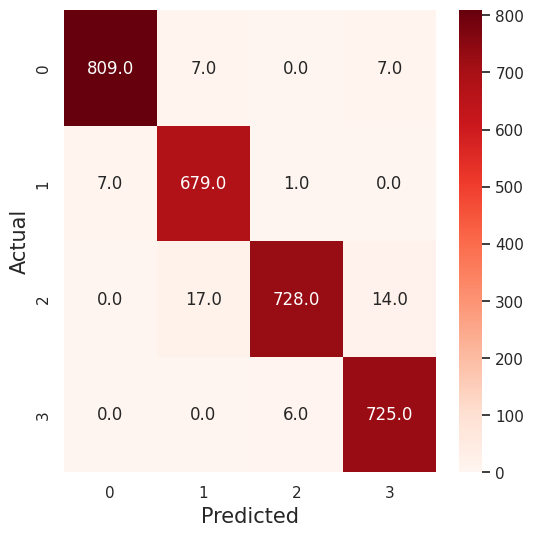

In [90]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
cm_plot = sns.heatmap( cm ,annot = True,cmap='Reds',fmt=".1f")
cm_plot.set_xlabel('Predicted', fontdict={'size': 15})
cm_plot.set_ylabel('Actual', fontdict={'size': 15})
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

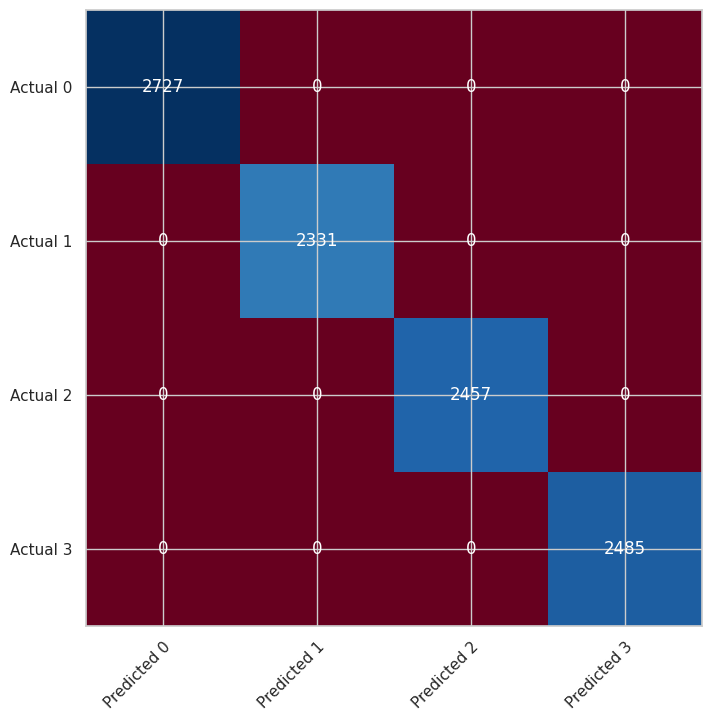

In [91]:
cm = confusion_matrix(y, model2.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(cm, cmap=plt.cm.RdBu)

# Add gridlines
ax.grid(True)

# Set labels for x-axis and y-axis
ax.set_xticks([0, 1, 2,3])
ax.set_yticks([0, 1, 2,3])
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])

# Rotate the tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations to the cells
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

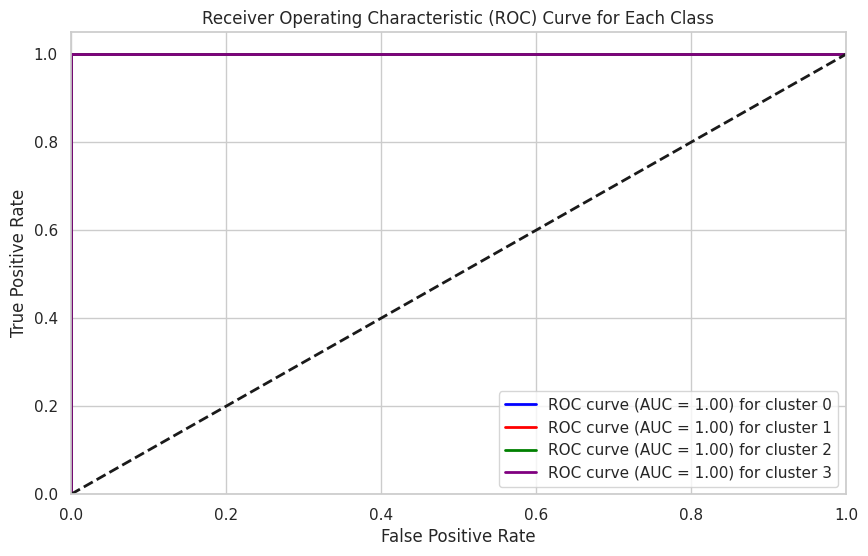

In [92]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels (convert them into one-hot encoding)
n_classes = 4  # Number of classes
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming 'model' is your trained classification model
scores = model2.predict_proba(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for cluster {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

In [93]:
!pip install shap
import shap
explainer = shap.Explainer(model, x_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.8 MB/s eta 0:00:00


In [94]:
importances = model.feature_importances_
importances

array([0.01007775, 0.00708265, 0.00561677, 0.0420732 , 0.02814759,
       0.01033652, 0.00650763, 0.8685114 , 0.00337795, 0.00314144,
       0.00340076, 0.00427658, 0.00744975])

In [95]:
feature_importance_ranking = sorted(zip(importances, x), reverse=True)
for importance, feature_name in feature_importance_ranking:
    print(f"{feature_name}: {importance}")

EstimatedSalary: 0.8685113995336442
Age: 0.042073200595482814
Tenure: 0.028147587735182042
marital: 0.010336518341133865
education: 0.010077754648261297
NumOfProducts: 0.00744975473758106
Geography: 0.007082654720037582
IsActiveMember: 0.0065076291160479196
Gender: 0.005616771395316434
HasCrCard: 0.004276576255578827
HasInsurance: 0.003400762819139839
HasApp: 0.0033779519723105334
HasLoan: 0.0031414381302836037


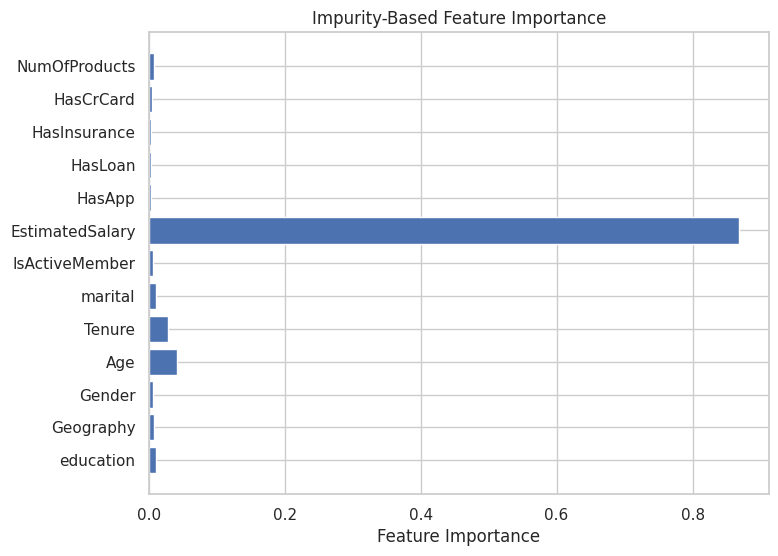

In [96]:
plt.figure(figsize=(8, 6))
plt.barh(range(x.shape[1]), importances, align='center')
plt.yticks(range(x.shape[1]), x.columns)
plt.xlabel('Feature Importance')
plt.title('Impurity-Based Feature Importance')
plt.show()

In [97]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=b2bad80e89c7905ca83b301bac2a9ef3c5dffe68cca357025601168f5380f2f1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [98]:
import eli5.sklearn
eli5.explain_weights(
    model,
    feature_names = list(x.columns) )

Weight,Feature
0.8685 ± 0.1426,EstimatedSalary
0.0421 ± 0.0504,Age
0.0281 ± 0.0341,Tenure
0.0103 ± 0.0133,marital
0.0101 ± 0.0123,education
0.0074 ± 0.0093,NumOfProducts
0.0071 ± 0.0082,Geography
0.0065 ± 0.0098,IsActiveMember
0.0056 ± 0.0088,Gender
0.0043 ± 0.0053,HasCrCard


In [99]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f0347392e7b132f7b2940a9f6eb71a6f20b8b0efad66cb56e2750ca4ac00c99d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [100]:
import lime
import lime.lime_tabular
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = x_train.to_numpy(),
                                   training_labels = y_train,
                                   feature_names = list(x.columns),
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))


In [101]:
x.head()

,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts
0,2,5,0,42,2,1,1,101348.88,1,1,1,1,4
1,1,5,0,41,1,2,1,112542.58,0,0,1,1,2
2,1,4,0,42,8,1,0,113931.57,0,0,0,0,0
3,3,4,0,39,1,1,0,93826.63,1,0,0,0,1
4,3,5,0,43,2,2,1,79084.10,1,0,0,0,1


In [102]:
from google.colab import files
uploaded=files.upload()
import io
ts=pd.read_csv(io.BytesIO(uploaded['TestData.csv']))

Saving TestData.csv to TestData.csv


In [116]:
def filter_customer(customer_id):
  z=ts[ts["CustomerId"] == customer_id].iloc[0:1,1:]
  return z

In [104]:
ts[ts["CustomerId"] == 156347].iloc[0:1,1:]

,education,Geography,Gender,Age,Tenure,marital,IsActiveMember,EstimatedSalary,HasApp,HasLoan,HasInsurance,HasCrCard,NumOfProducts
1,3,5,1,41,1,1,1,112542.58,0,0,1,1,2


In [119]:
filtered =filter_customer(1563470)
filtered
if(filtered.empty):
  print('Customer does not exist')
else:
  print("Cluster is ",model.predict(filtered))

Customer does not exist
